# Scratch paper
This notebook is used to cross validate the performance of models with different (hyper)parameters.

In [1]:
import utils

Loading functions and raw data
Processing training data
[IterativeImputer] Completing matrix with shape (1460, 80)
[IterativeImputer] Change: 200.1083402287338, scaled tolerance: 755.0 
[IterativeImputer] Early stopping criterion reached.


C:\Users\yixin\AppData\Roaming\Python\Python310\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\yixin\AppData\Roaming\Python\Python310\site-packages\numpy\core\_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\yixin\AppData\Roaming\Python\Python310\site-packages\numpy\core\_methods.py:187: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


Processing test data
[IterativeImputer] Completing matrix with shape (1459, 79)
[IterativeImputer] Change: 144.23696938547496, scaled tolerance: 56.6 
[IterativeImputer] Change: 25.143251270912472, scaled tolerance: 56.6 
[IterativeImputer] Early stopping criterion reached.


C:\Users\yixin\AppData\Roaming\Python\Python310\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\yixin\AppData\Roaming\Python\Python310\site-packages\numpy\core\_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\yixin\AppData\Roaming\Python\Python310\site-packages\numpy\core\_methods.py:187: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


Data Loading and preprocessing complete!


In [2]:
from utils import train_csv, test_csv

from utils import train_capped, train_nocap
from utils import train_log_transformed, train_log_transformed_capped, train_log_transformed_nocap
from utils import train_absmax_transformed, train_absmax_transformed_capped, train_absmax_transformed_nocap
from utils import train_zscore_transformed, train_zscore_transformed_capped, train_zscore_transformed_nocap
from utils import train_minmax_transformed, train_minmax_transformed_capped, train_minmax_transformed_nocap
from utils import train_yj_transformed, train_yj_transformed_capped, train_yj_transformed_nocap

from utils import test_csv, test_minmax_transformed, test_absmax_transformed, test_log_transformed, test_zscore_transformed, test_yj_transformed

In [3]:
from utils import test_model_rmse, check_residuals, data_transform, iterative_impute

In [22]:
models_map = {
    "train_log_transformed": train_log_transformed,
    "train_log_transformed_capped": train_log_transformed_capped,
    "train_log_transformed_nocap":train_log_transformed_nocap,
    "train_absmax_transformed": train_absmax_transformed,
    "train_absmax_transformed_capped": train_absmax_transformed_capped,
    "train_absmax_transformed_nocap": train_absmax_transformed_nocap,
    "train_zscore_transformed":train_zscore_transformed,
    "train_zscore_transformed_capped": train_zscore_transformed_capped,
    "train_zscore_transformed_nocap": train_zscore_transformed_nocap,
    "train_minmax_transformed":  train_minmax_transformed,
    "train_minmax_transformed_capped": train_minmax_transformed_capped,
    "train_minmax_transformed_nocap":train_minmax_transformed_nocap,
    "train_yj_transformed": train_yj_transformed,
    "train_yj_transformed_capped": train_yj_transformed_capped,
    "train_yj_transformed_nocap": train_yj_transformed_nocap,
    "train_raw": train_csv,
    "train_capped": train_capped,
    "train_nocap": train_nocap} 

In [5]:
# for data_name, data in models_map.items():
#     print(" ")
#     data_to_test = data.copy()
#     data_to_test = iterative_impute(data_to_test)
#     print(f"Start evaluating {data_name}:")
#     test_model_rmse(data_to_test, result_to_txt = True, df_name=data_name)

In [6]:
sqrt_transformed = data_transform(train_csv, "sqrt")
sqrt_transformed_nocap = utils.remove_outliers(sqrt_transformed)
sqrt_transformed_capped_99 = utils.remove_outliers_capping(sqrt_transformed)
sqrt_transformed_capped_95 = utils.remove_outliers_capping(sqrt_transformed, lower_bond=0, upper_bond=0.95)

C:\Users\yixin\AppData\Roaming\Python\Python310\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [7]:
test_sqrt_transformed = utils.data_transform_test(test_csv)

In [8]:
models_map = {
    "sqrt_transformed": sqrt_transformed,
    "sqrt_transformed_nocap": sqrt_transformed_nocap,
    "sqrt_transformed_capped_99": sqrt_transformed_capped_99,
    "sqrt_transform_capped_95": sqrt_transformed_capped_95
}

for data_name, data in models_map.items():
    print(" ")
    data_to_test = data.copy()
    data_to_test = iterative_impute(data_to_test)
    print(f"Start evaluating {data_name}:")
    test_model_rmse(data_to_test, result_to_txt = True, df_name=data_name)

 
[IterativeImputer] Completing matrix with shape (1460, 80)
[IterativeImputer] Change: 5.607856621277502, scaled tolerance: 755.0 
[IterativeImputer] Early stopping criterion reached.
Start evaluating sqrt_transformed:
Mean RMSE: 35312.953 STD: 6682.195 alpha=0.0001
Mean RMSE: 35312.953 STD: 6682.195 alpha=0.00012067926406393288
Mean RMSE: 35312.953 STD: 6682.195 alpha=0.00014563484775012445
Mean RMSE: 35312.953 STD: 6682.195 alpha=0.00017575106248547912
Mean RMSE: 35312.953 STD: 6682.195 alpha=0.00021209508879201905
Mean RMSE: 35312.953 STD: 6682.196 alpha=0.0002559547922699536
Mean RMSE: 35312.953 STD: 6682.196 alpha=0.00030888435964774815
Mean RMSE: 35312.953 STD: 6682.197 alpha=0.0003727593720314938
Mean RMSE: 35312.952 STD: 6682.197 alpha=0.0004498432668969444
Mean RMSE: 35312.952 STD: 6682.198 alpha=0.0005428675439323859
Mean RMSE: 35312.952 STD: 6682.198 alpha=0.0006551285568595509
Mean RMSE: 35312.952 STD: 6682.199 alpha=0.0007906043210907702
Mean RMSE: 35312.951 STD: 6682.200

In [23]:
for data in models_map.values():
    print(len(data))

1460
1219
815
1460
1217
855
1460
1217
855
1460
1217
855
1460
1239
865
1460
1217
855


[IterativeImputer] Completing matrix with shape (753, 80)
[IterativeImputer] Change: 2.526662767147121, scaled tolerance: 392.0 
[IterativeImputer] Early stopping criterion reached.
(151,) (151,) (151,)


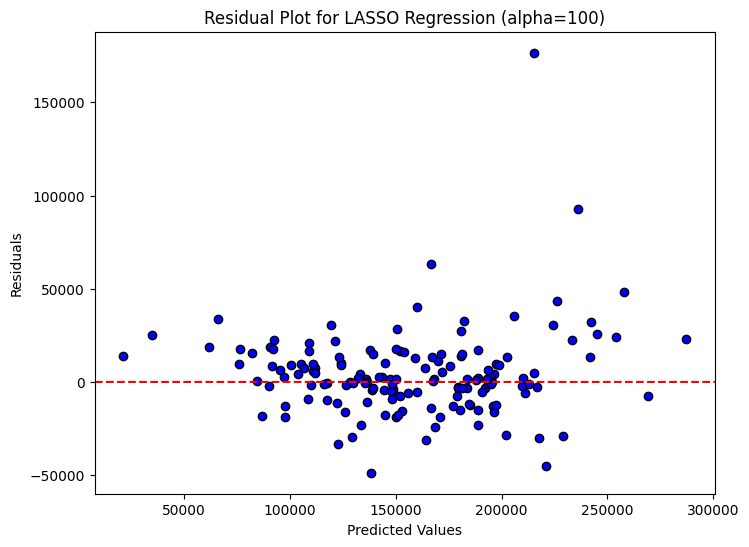

In [21]:
check_residuals(utils.iterative_impute(sqrt_transformed_capped_95), 100)

In [11]:
train_log_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1460 non-null   float64
 1   1       1460 non-null   float64
 2   2       1460 non-null   float64
 3   3       1460 non-null   float64
 4   4       1460 non-null   float64
 5   5       1460 non-null   float64
 6   6       1460 non-null   float64
 7   7       1460 non-null   float64
 8   8       1460 non-null   float64
 9   9       1460 non-null   float64
 10  10      1460 non-null   float64
 11  11      1460 non-null   float64
 12  12      1460 non-null   float64
 13  13      1460 non-null   float64
 14  14      1460 non-null   float64
 15  15      1460 non-null   float64
 16  16      1460 non-null   float64
 17  17      1460 non-null   float64
 18  18      1460 non-null   float64
 19  19      1460 non-null   float64
 20  20      1460 non-null   float64
 21  21      1460 non-null   float64
 22  

In [12]:
test_csv

0    1      2        3    4    5    6    7    8    9   ...     69  \
0      5.0  2.0   80.0  11622.0  1.0  2.0  3.0  3.0  0.0  4.0  ...  120.0   
1      5.0  3.0   81.0  14267.0  1.0  2.0  0.0  3.0  0.0  0.0  ...    0.0   
2     10.0  3.0   74.0  13830.0  1.0  2.0  0.0  3.0  0.0  4.0  ...    0.0   
3     10.0  3.0   78.0   9978.0  1.0  2.0  0.0  3.0  0.0  4.0  ...    0.0   
4      0.0  3.0   43.0   5005.0  1.0  2.0  0.0  1.0  0.0  4.0  ...  144.0   
...    ...  ...    ...      ...  ...  ...  ...  ...  ...  ...  ...    ...   
1454   2.0  4.0   21.0   1936.0  1.0  2.0  3.0  3.0  0.0  4.0  ...    0.0   
1455   2.0  4.0   21.0   1894.0  1.0  2.0  3.0  3.0  0.0  4.0  ...    0.0   
1456   5.0  3.0  160.0  20000.0  1.0  2.0  3.0  3.0  0.0  4.0  ...    0.0   
1457  14.0  3.0   62.0  10441.0  1.0  2.0  3.0  3.0  0.0  4.0  ...    0.0   
1458  10.0  3.0   74.0   9627.0  1.0  2.0  3.0  3.0  0.0  4.0  ...    0.0   

       70   71   72   73       74    75      76   77   78  
0     0.0  2.0  2.0  3.0      0.0   6.0  2010.0  8.0  4.0  
1     0.0  2.0  4.0  0.0  12500.0   6.0  2010.0  8.0  4.0  
2     0.0  2.0  2.0  3.0      0.0   3.0  2010.0  8.0  4.0  
3     0.0  2.0  4.0  3.0      0.0   6.0  2010.0  8.0  4.0  
4     0.0  2.0  4.0  3.0      0.0   1.0  2010.0  8.0  4.0  
...   ...  ...  ...  ...      ...   ...     ...  ...  ...  
1454  0.0  2.0  4.0  3.0      0.0   6.0  2006.0  8.0  4.0  
1455  0.0  2.0  4.0  3.0      0.0   4.0  2006.0  8.0  0.0  
1456  0.0  2.0  4.0  3.0      0.0   9.0  2006.0  8.0  0.0  
1457  0.0  2.0  2.0  2.0    700.0   7.0  2006.0  8.0  4.0  
1458  0.0  2.0  4.0  3.0      0.0  11.0  2006.0  8.0  4.0  

[1459 rows x 79 columns]

In [13]:
# Load data
import pandas as pd
import os
data_dirpath = 'C:\\Users\\yixin\\Desktop\\Workspace\\Personal GitHub Repos\\House-Prices\\Projects\\House price prediction\\data'

train_csv = pd.read_csv(os.path.join(data_dirpath, "train.csv"))
test_csv = pd.read_csv(os.path.join(data_dirpath, "test.csv"))

In [14]:
train_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [15]:
test_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [17]:
def label_encoder(df, start_index = 0):
    label_encoder = LabelEncoder()

    for col_name in df.columns:
        if df[col_name].dtype == "O":
            df[col_name] = label_encoder.fit_transform(df[col_name]) + start_index

    return df

train_csv = label_encoder(train_csv, 1)
test_csv = label_encoder(test_csv, 1)

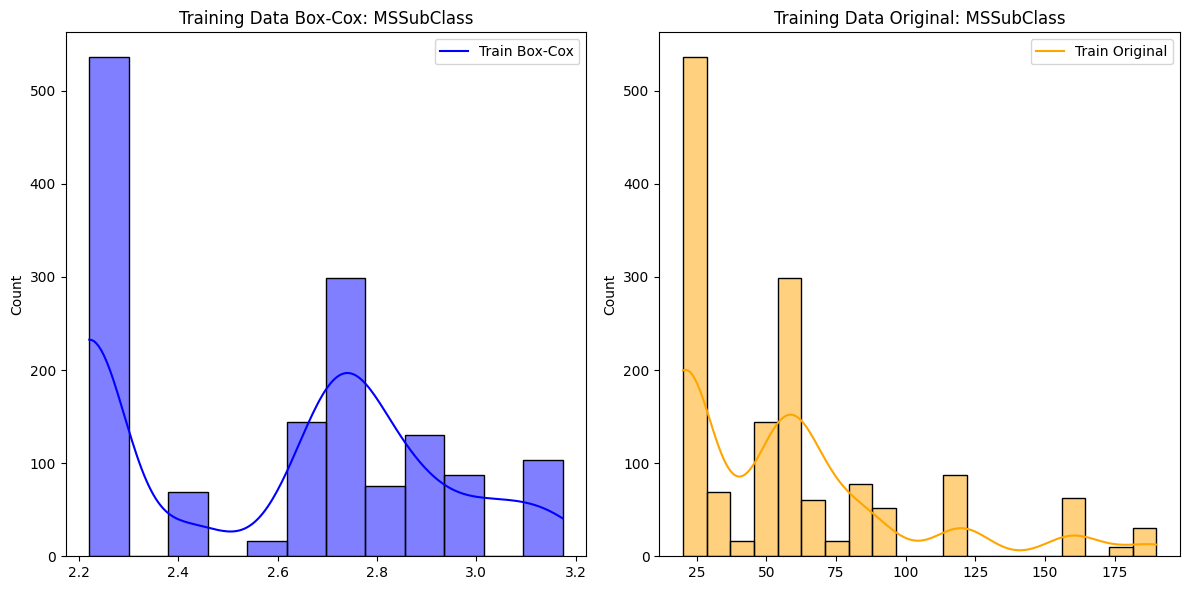

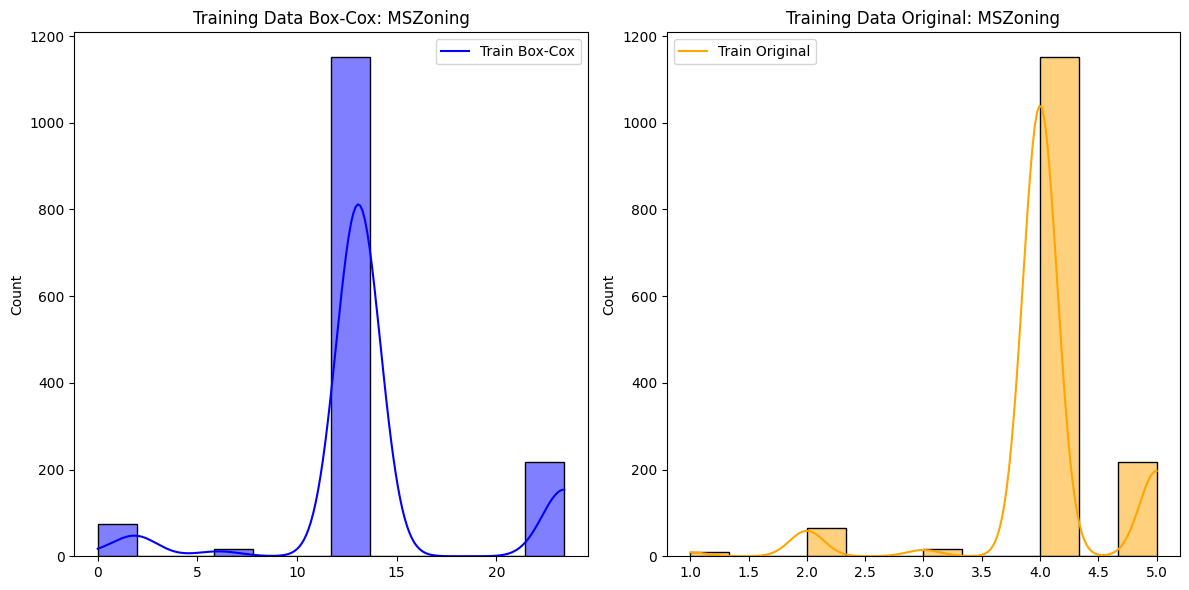

Error applying Box-Cox to data: The algorithm terminated without finding a valid bracket. Consider trying different initial points.


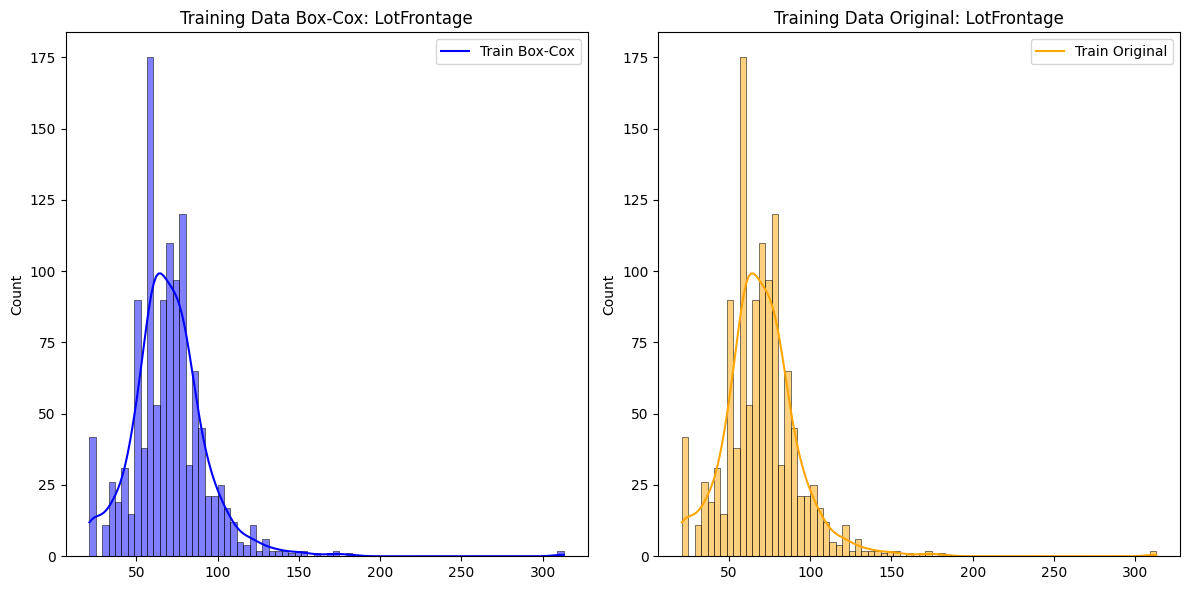

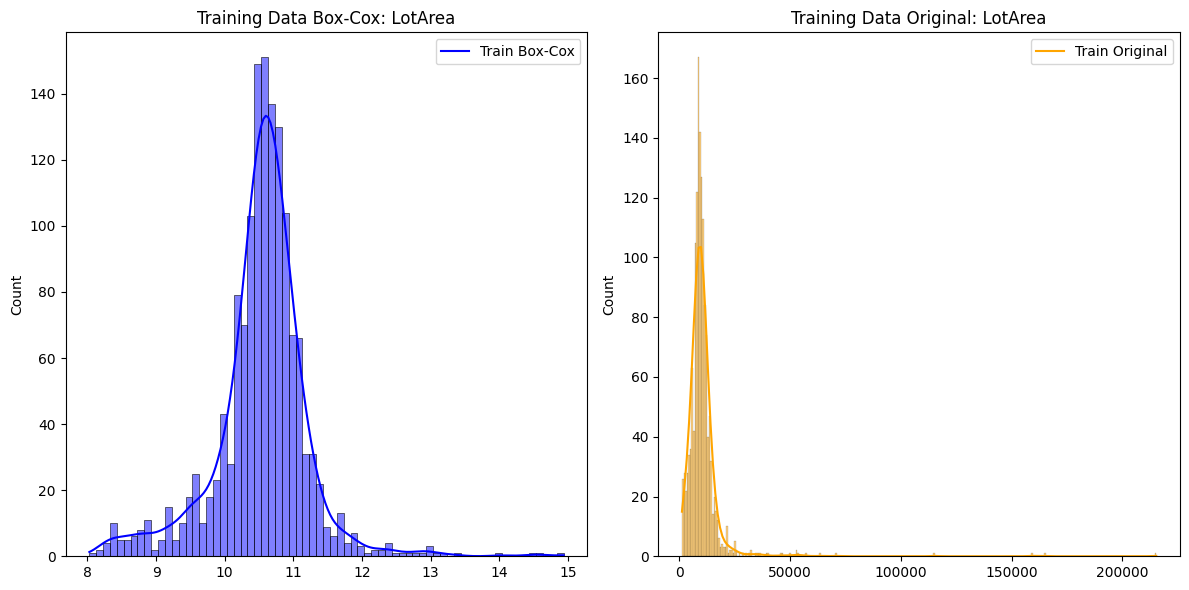

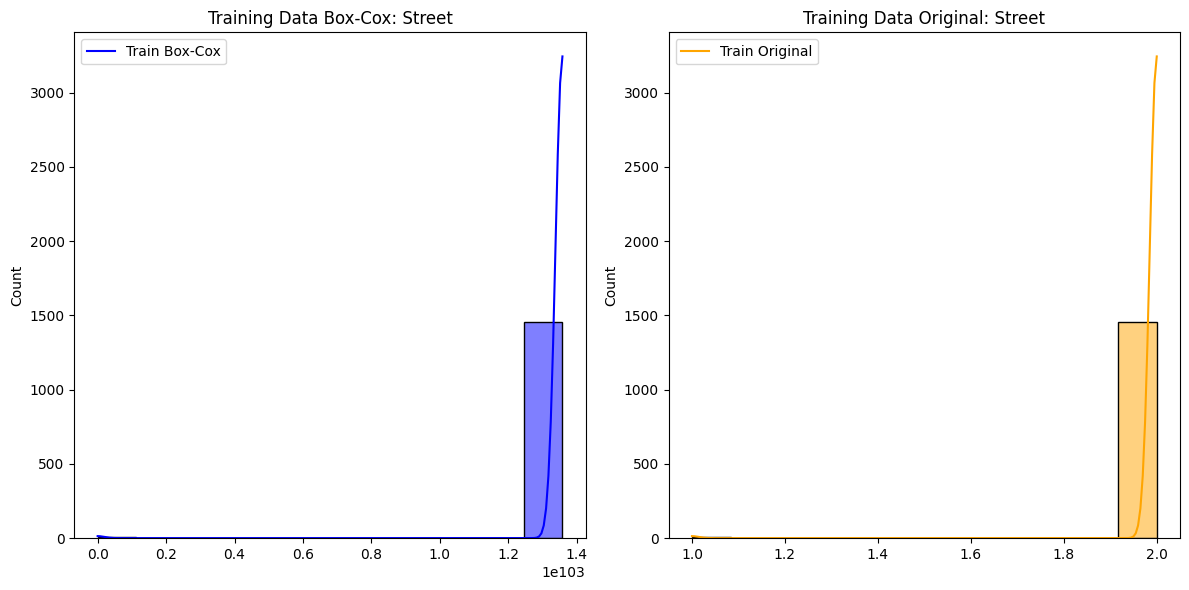

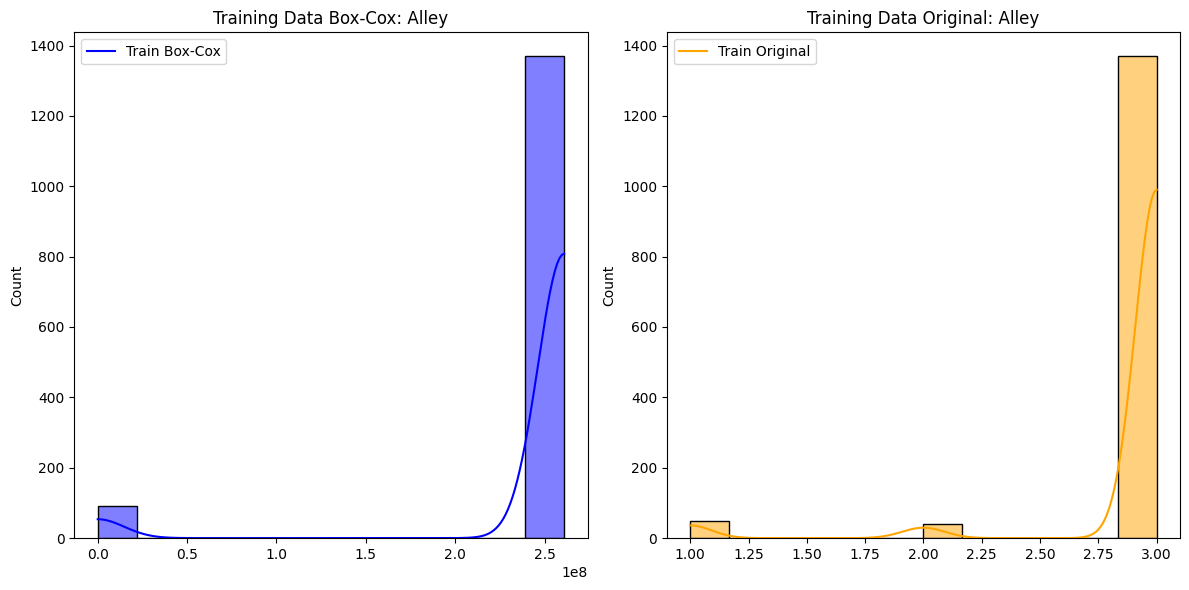

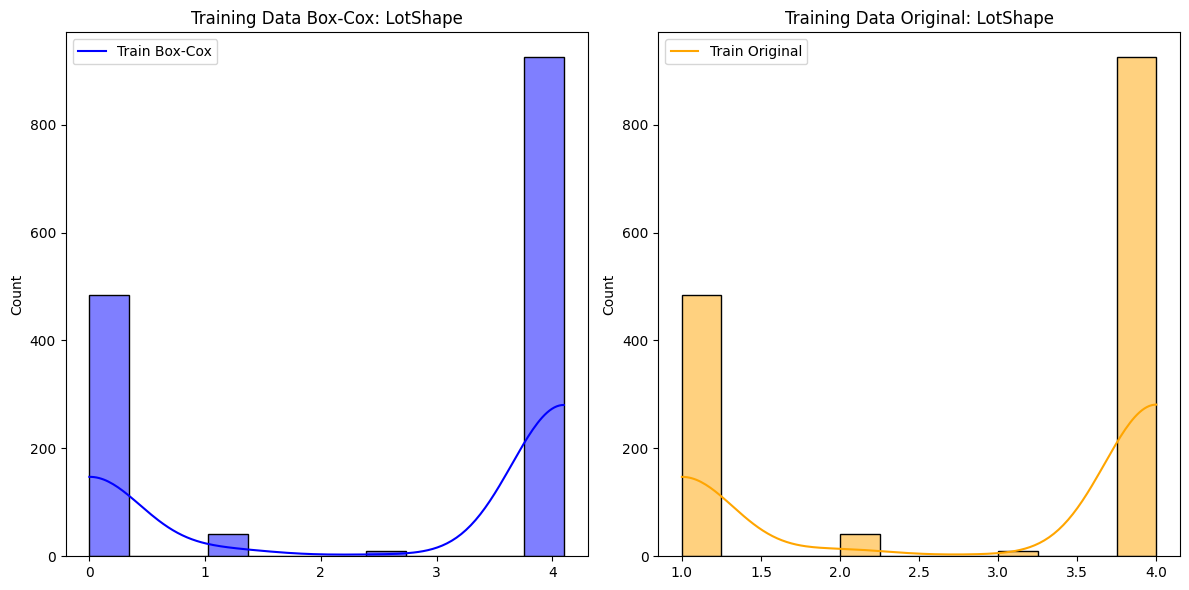

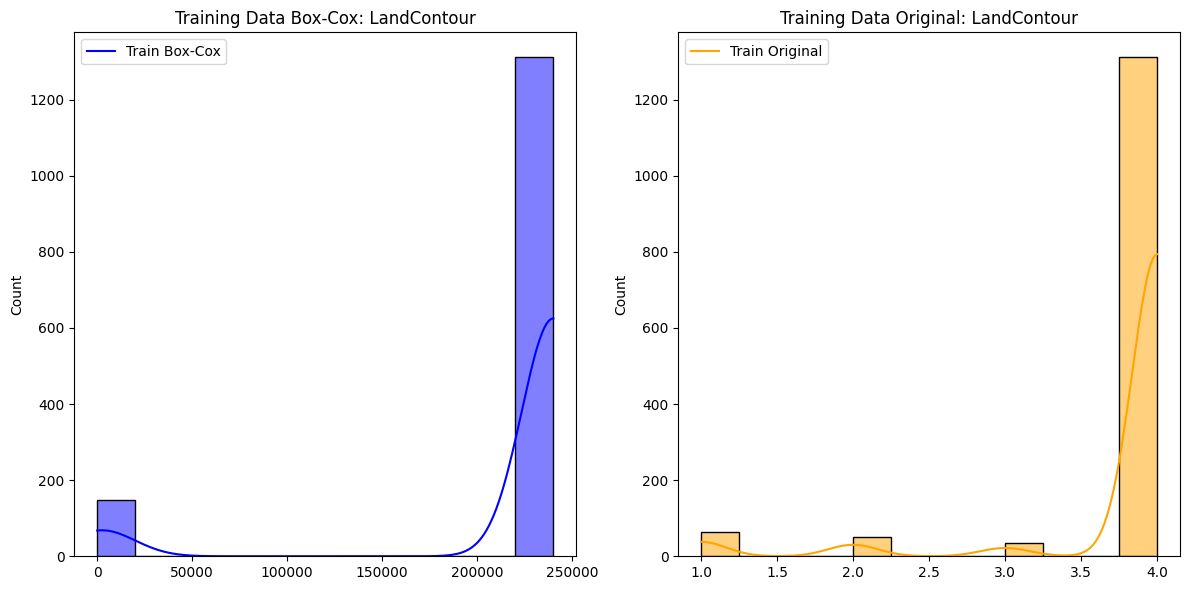

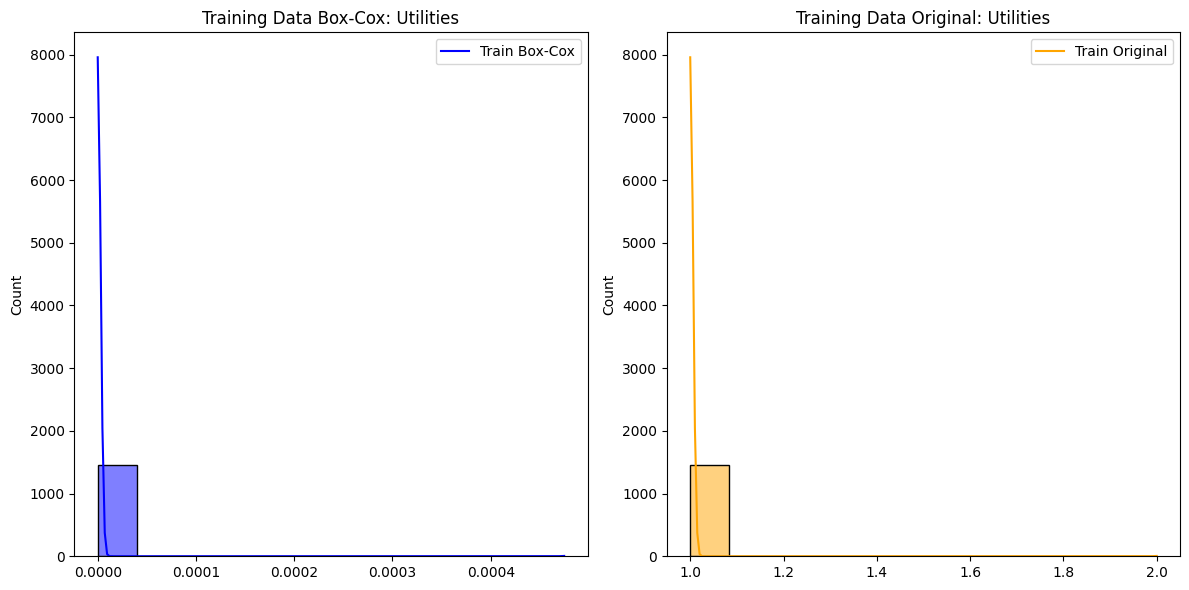

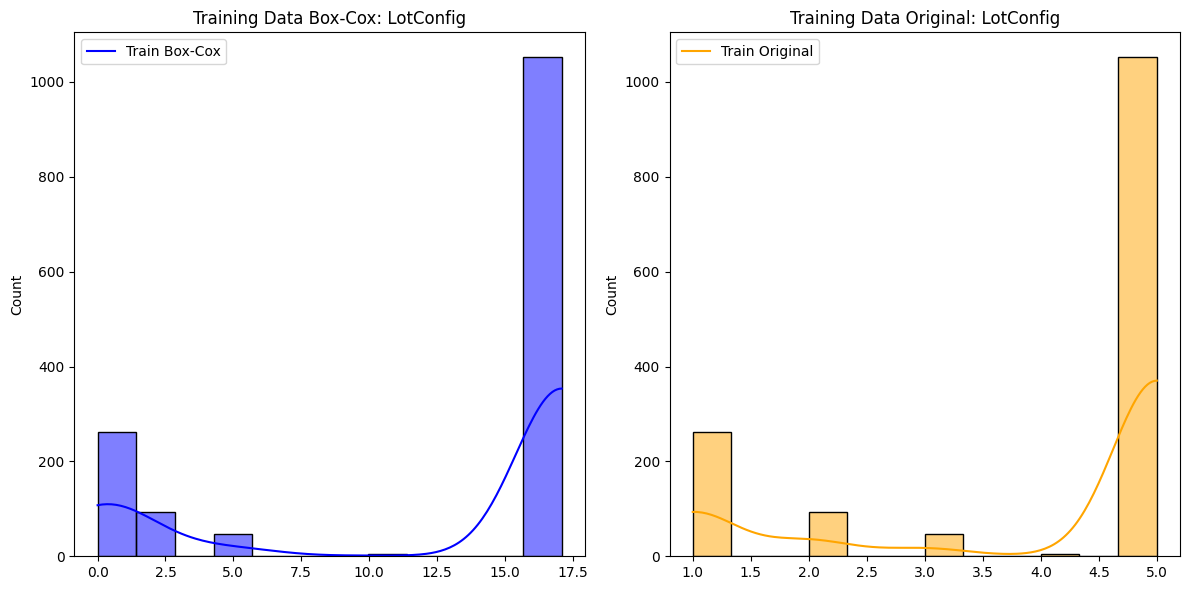

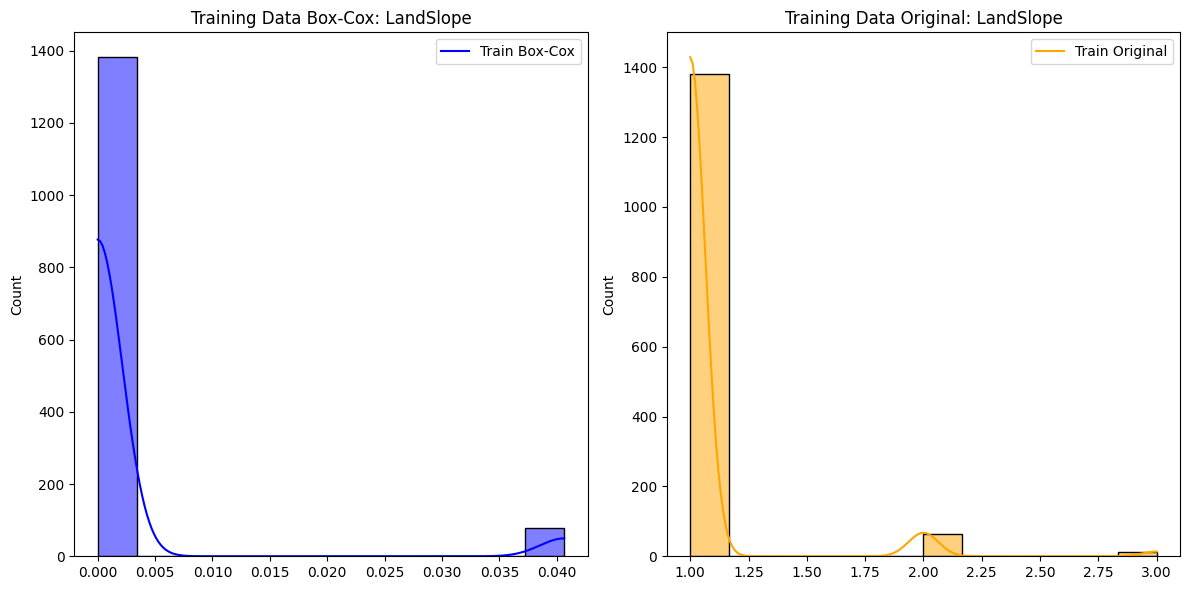

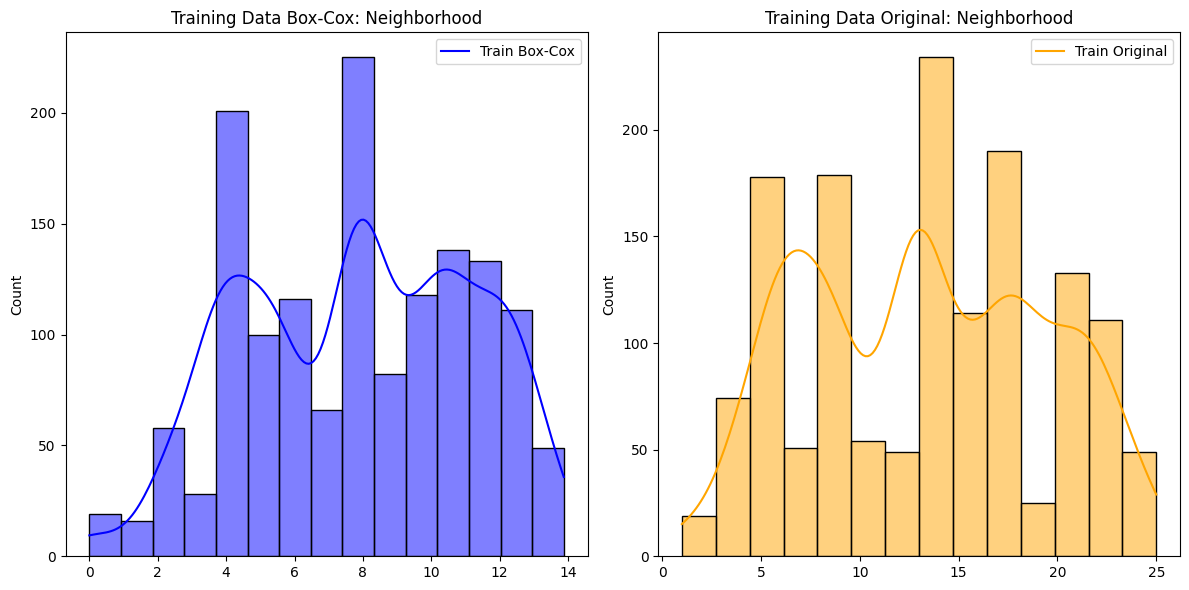

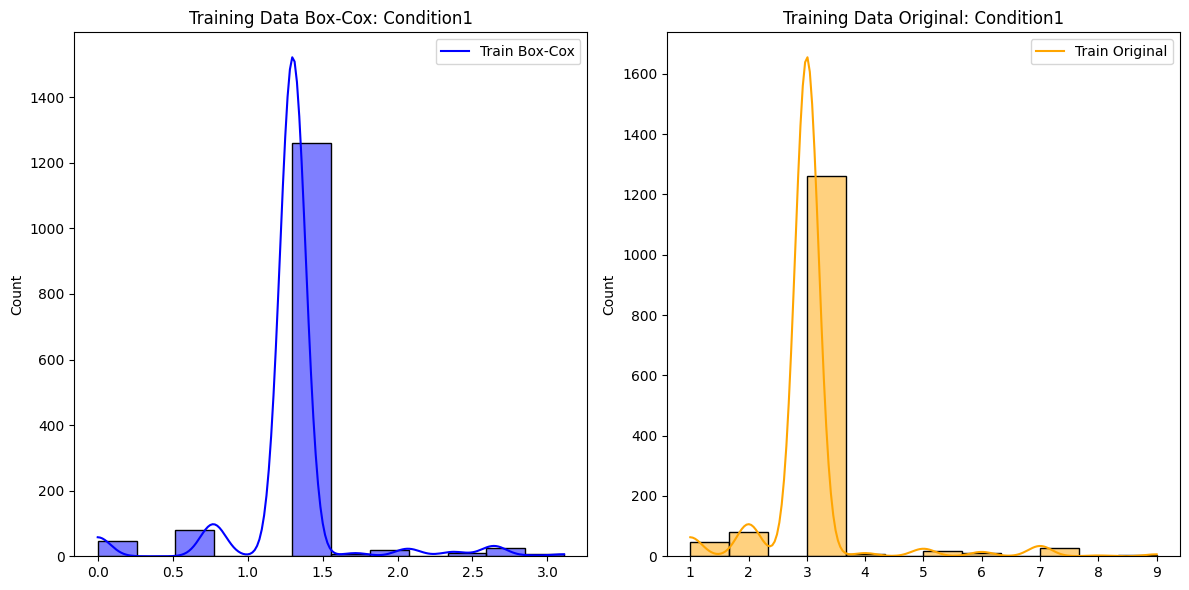

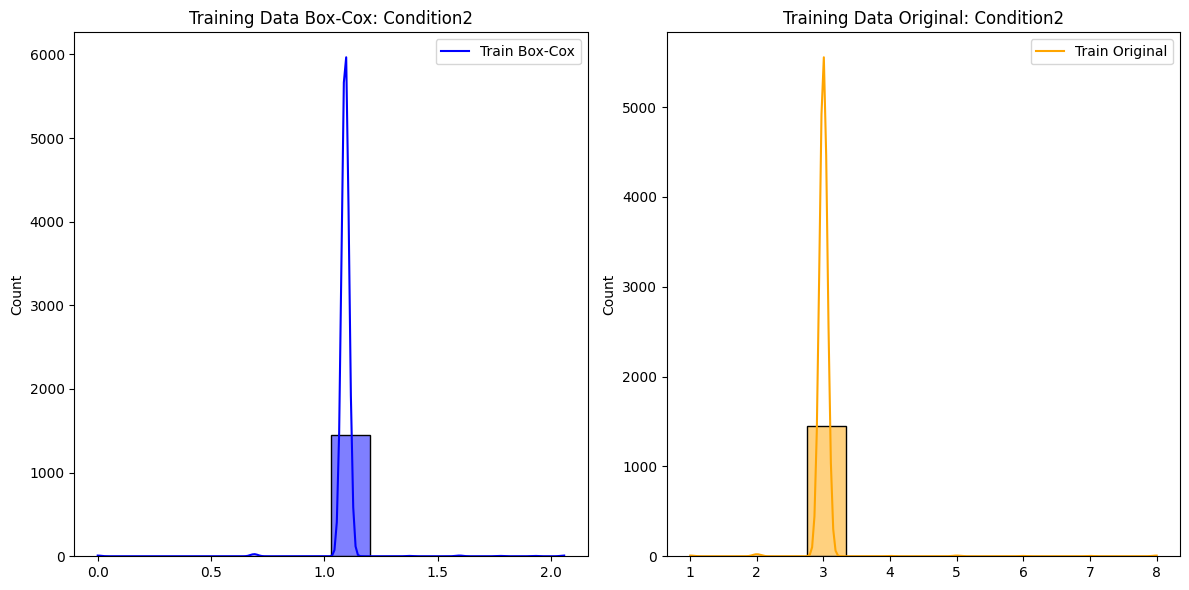

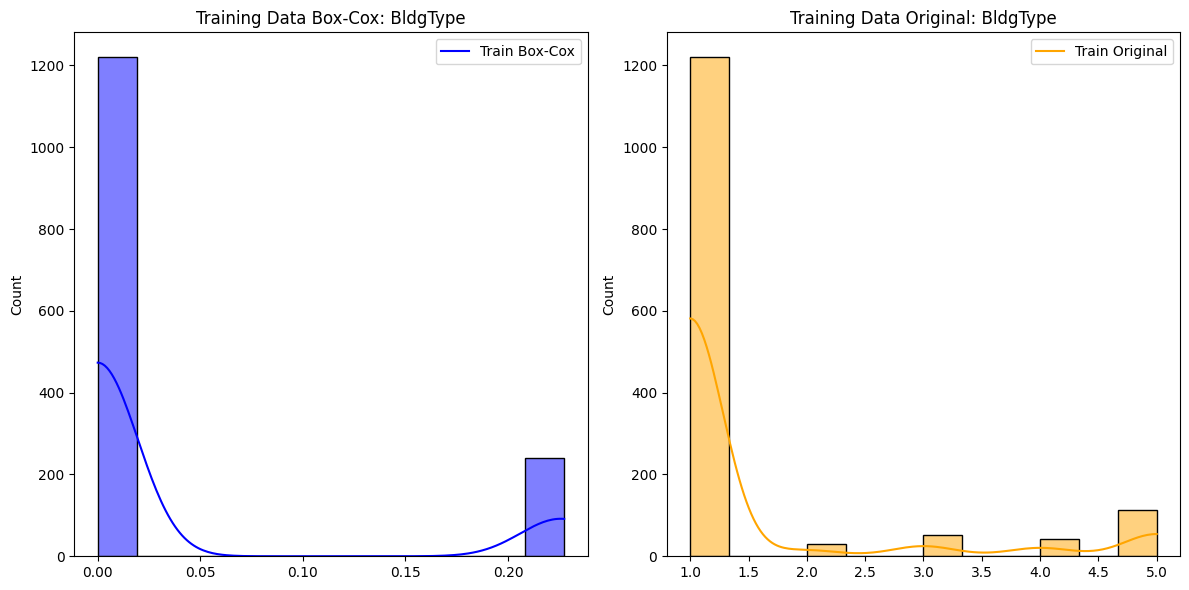

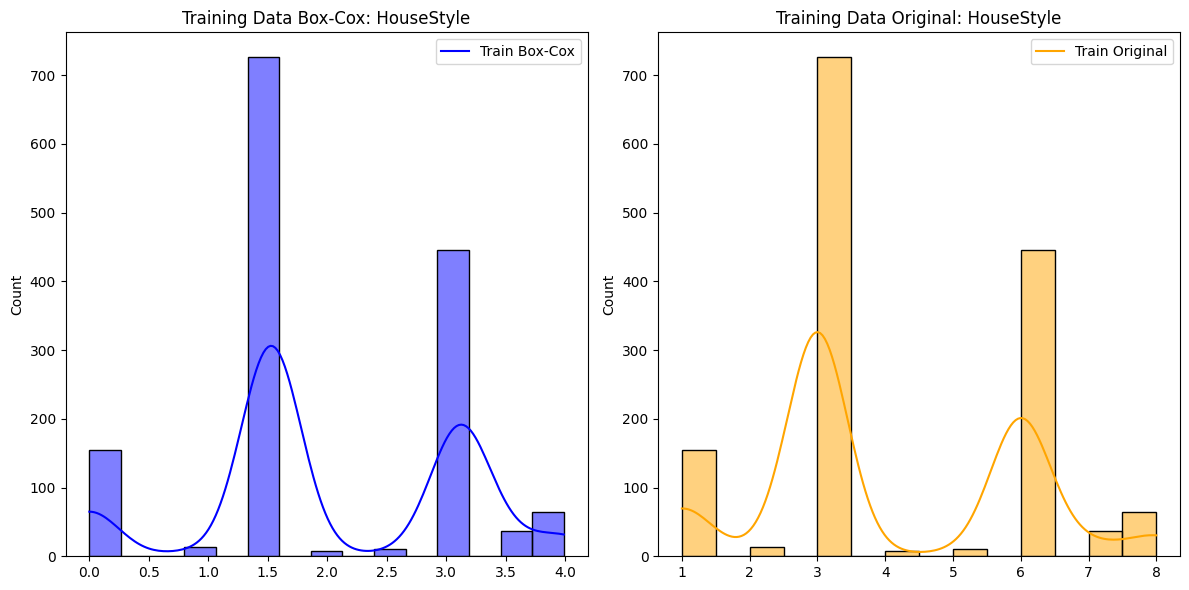

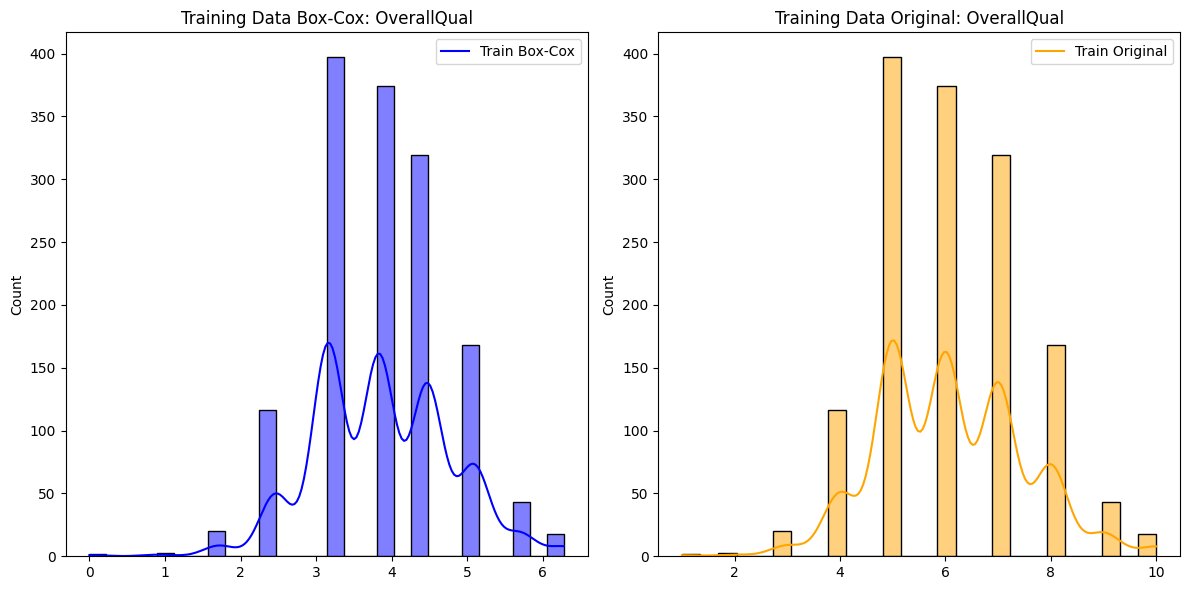

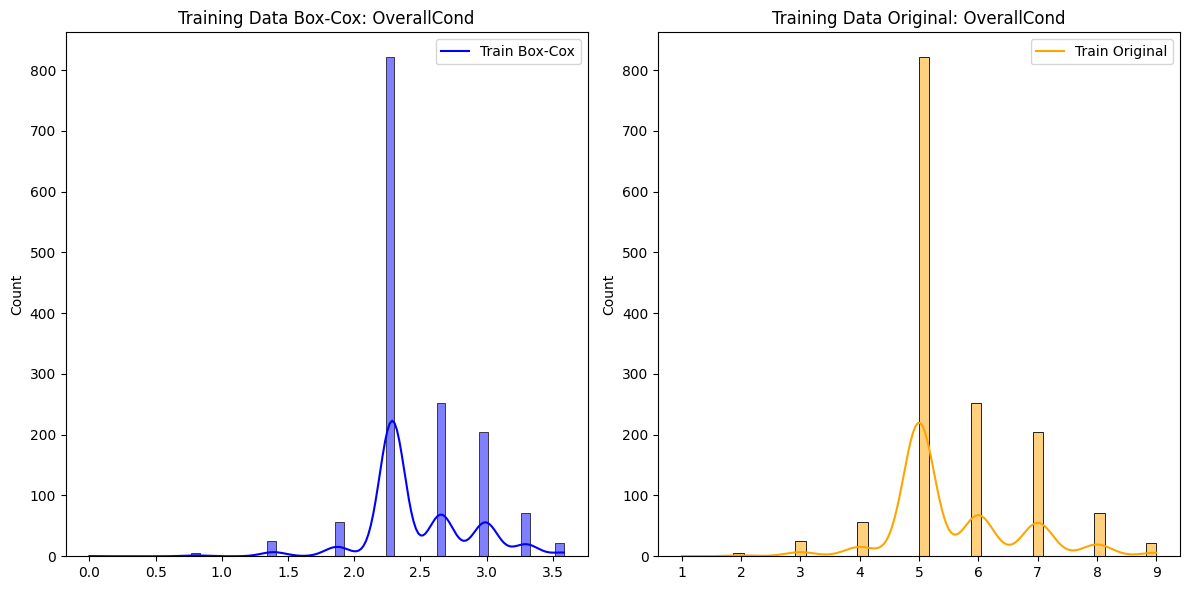

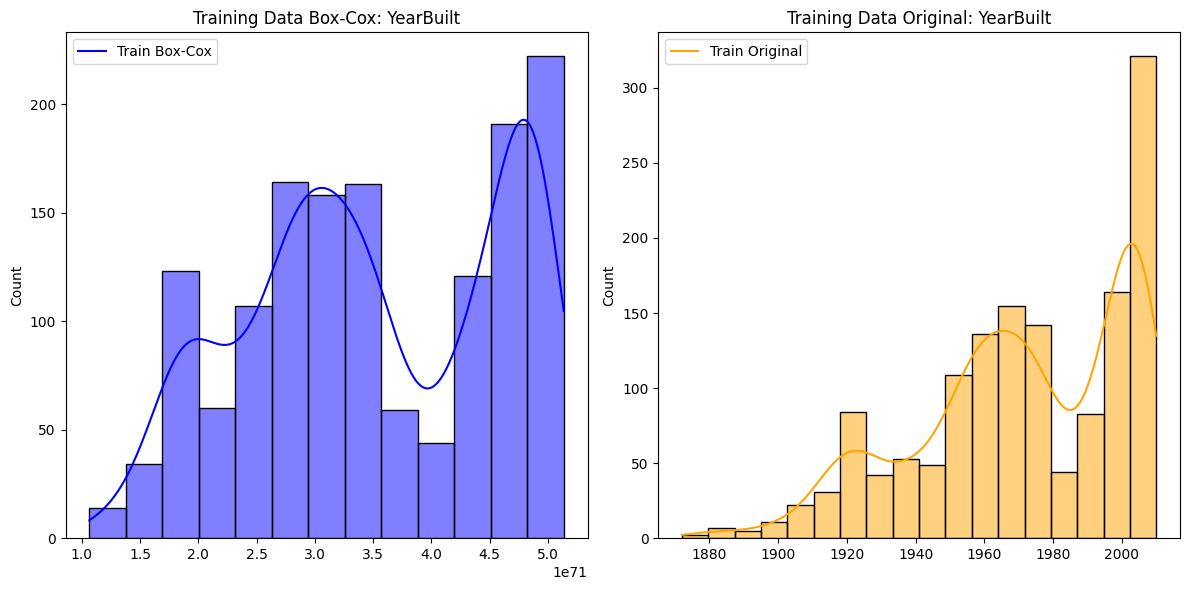

C:\Users\yixin\AppData\Roaming\Python\Python310\site-packages\numpy\core\_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\yixin\AppData\Roaming\Python\Python310\site-packages\scipy\optimize\_optimize.py:2489: RuntimeWarning: invalid value encountered in scalar multiply
  tmp2 = (x - v) * (fx - fw)


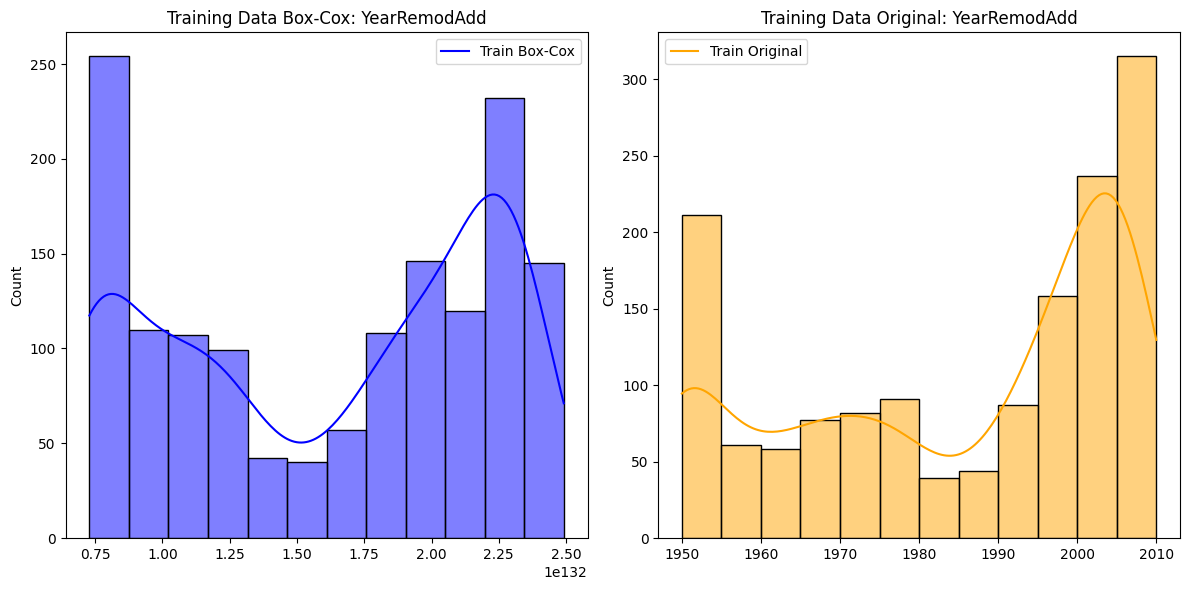

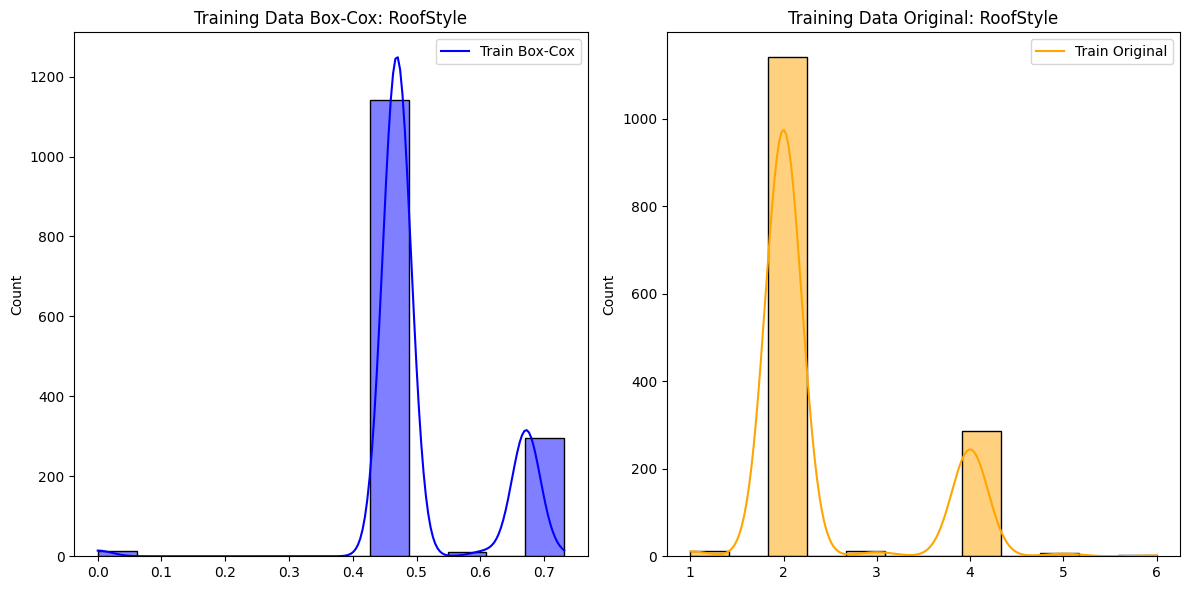

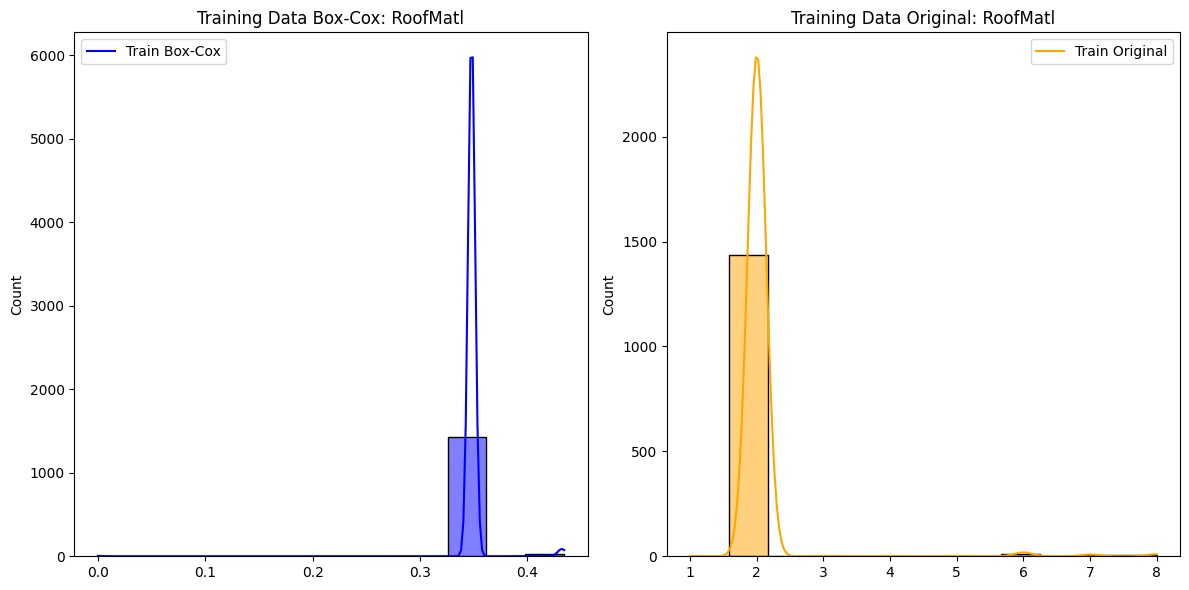

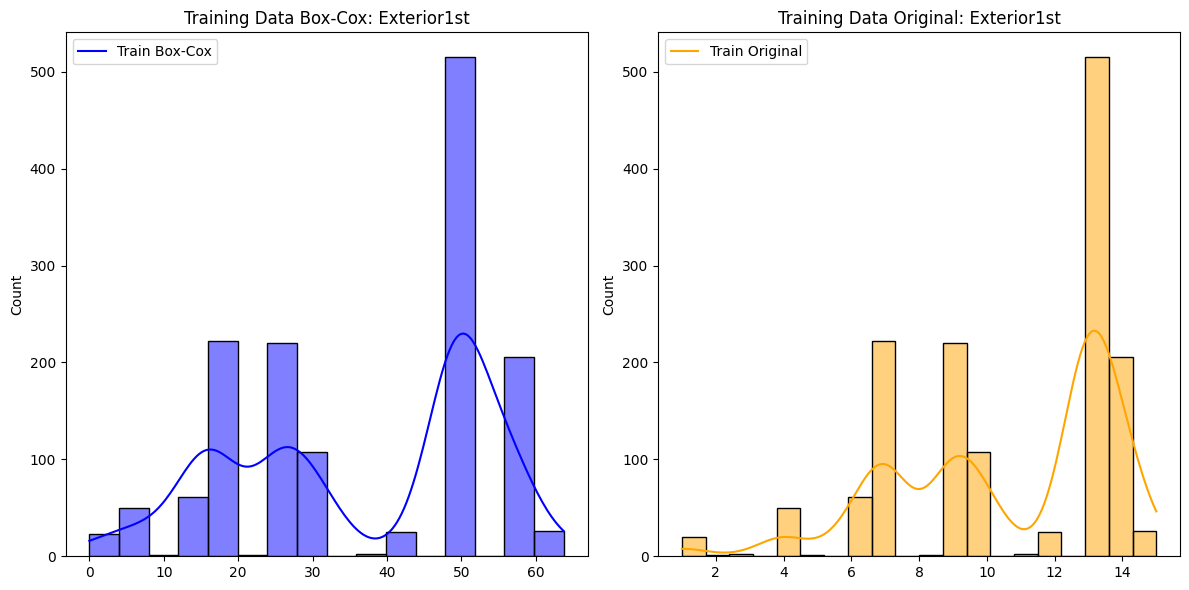

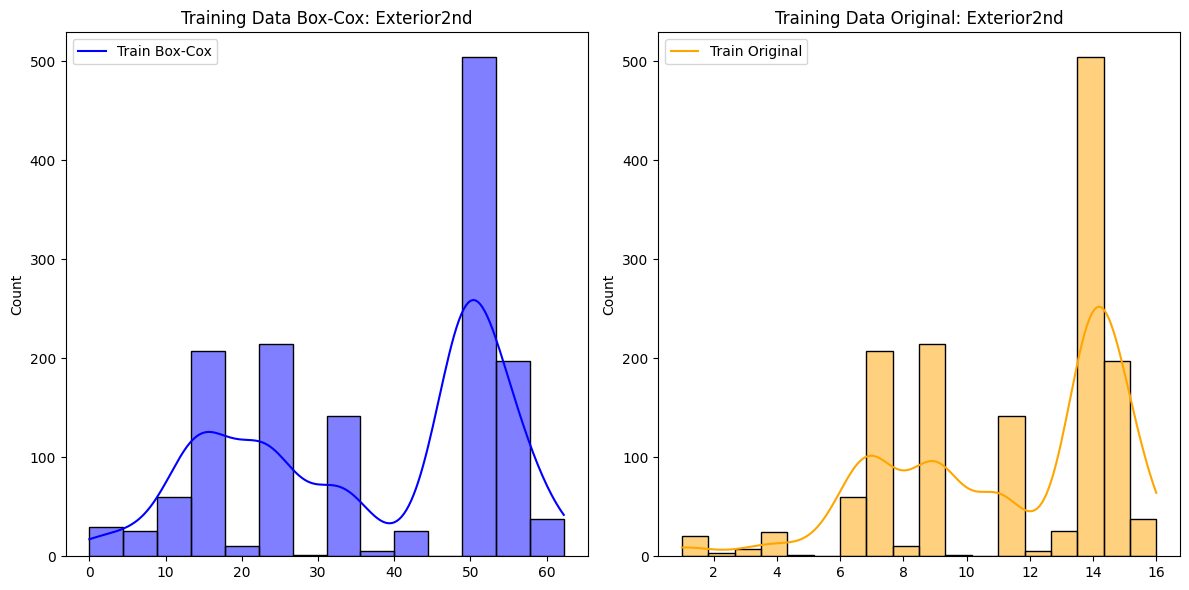

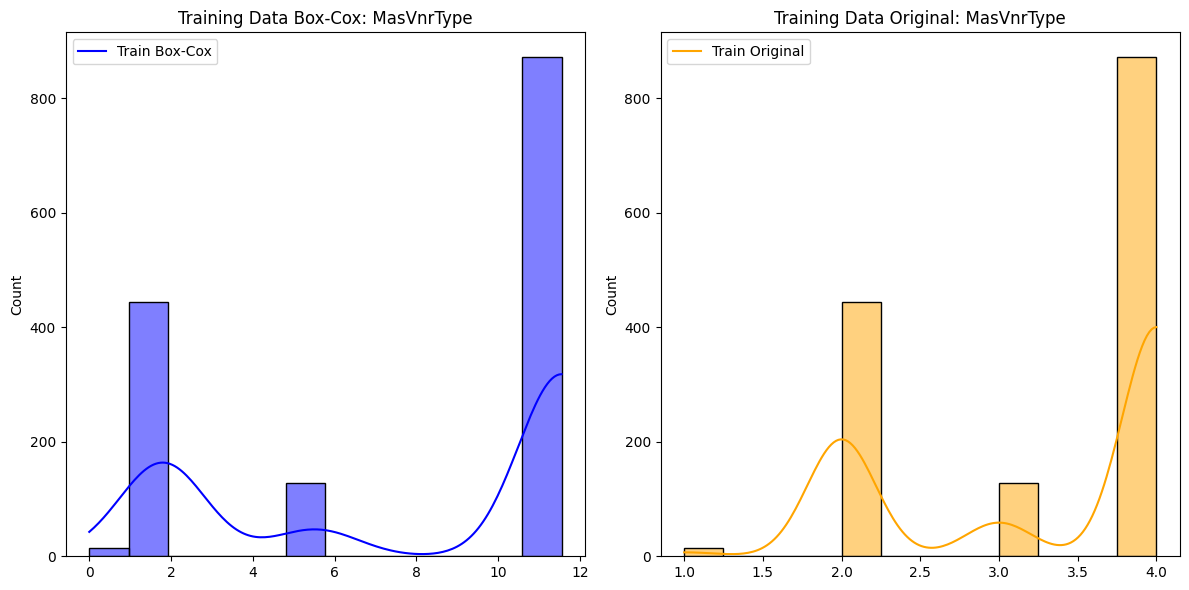

Error applying Box-Cox to data: All data must be positive for Box-Cox transformation.


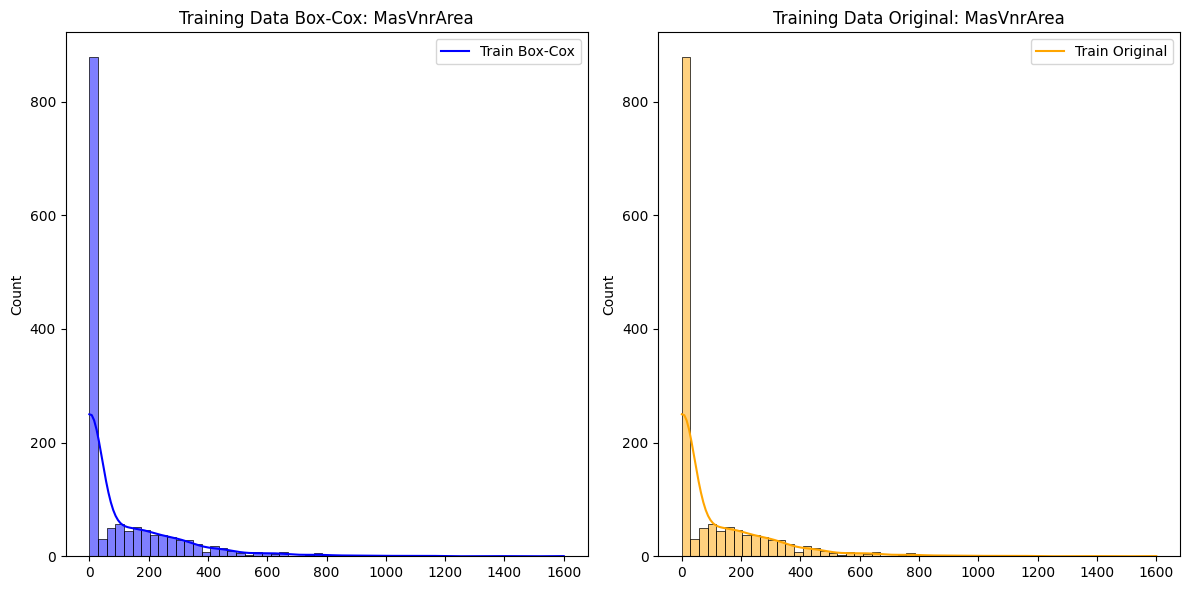

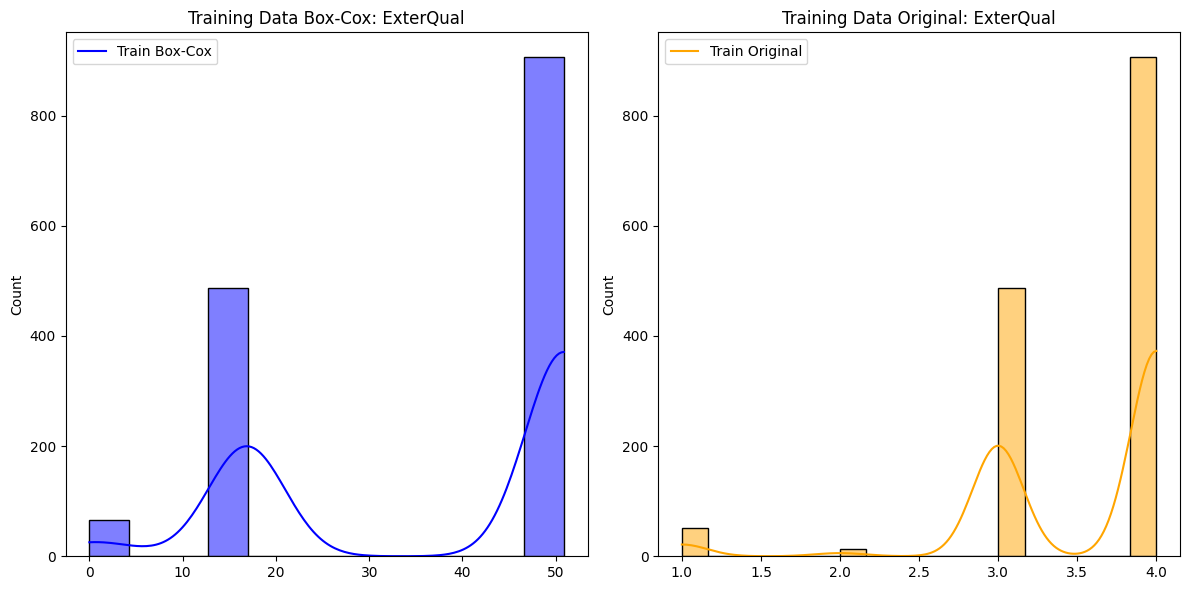

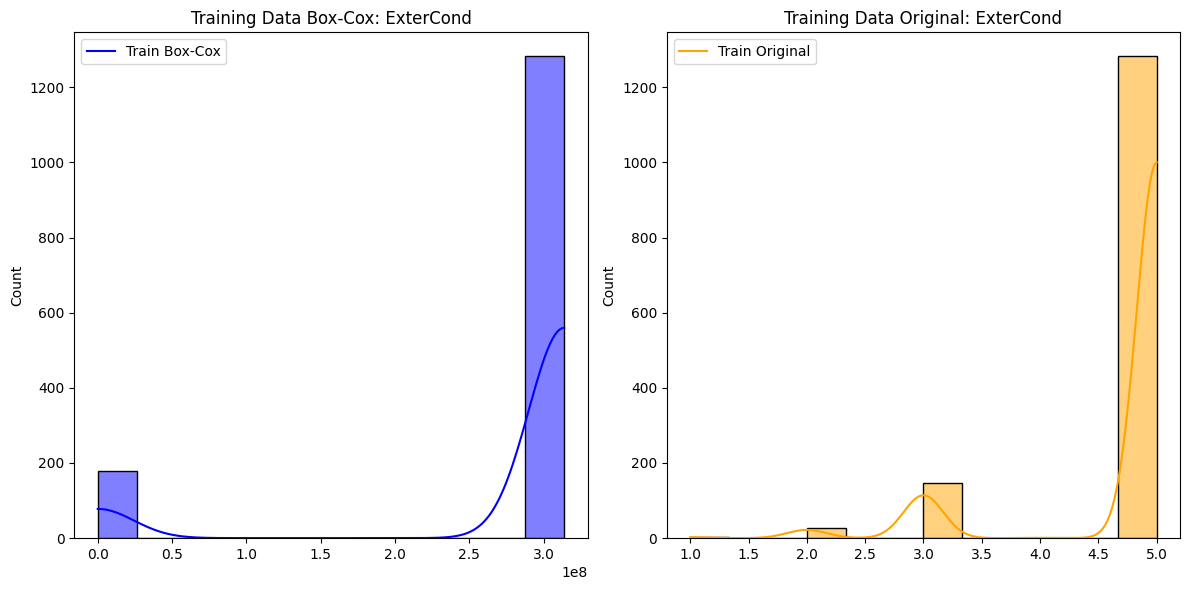

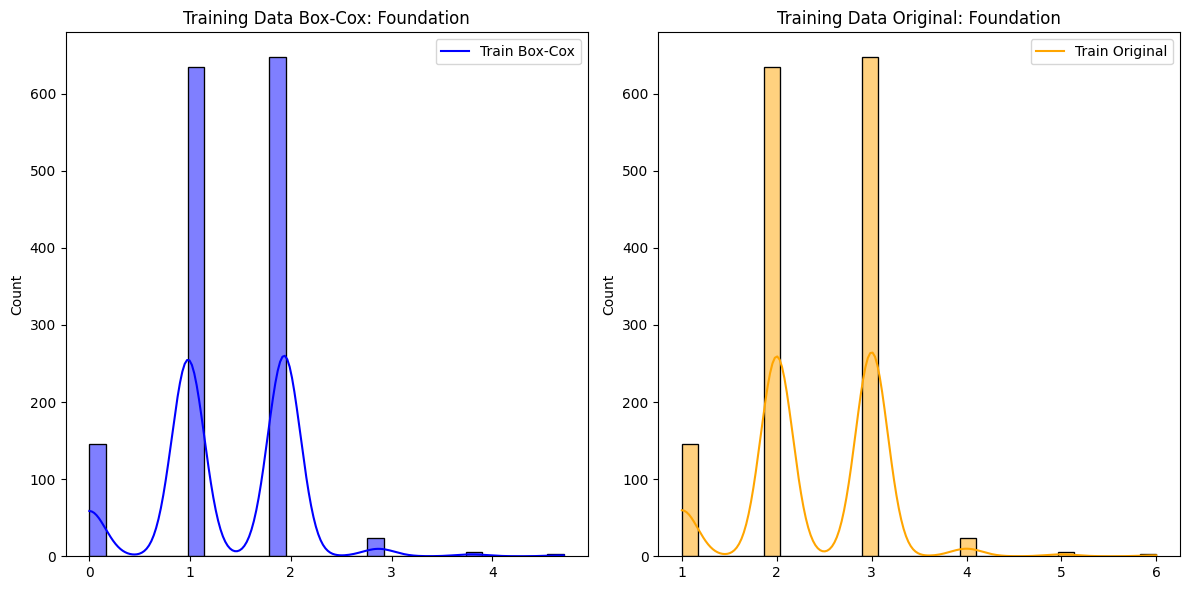

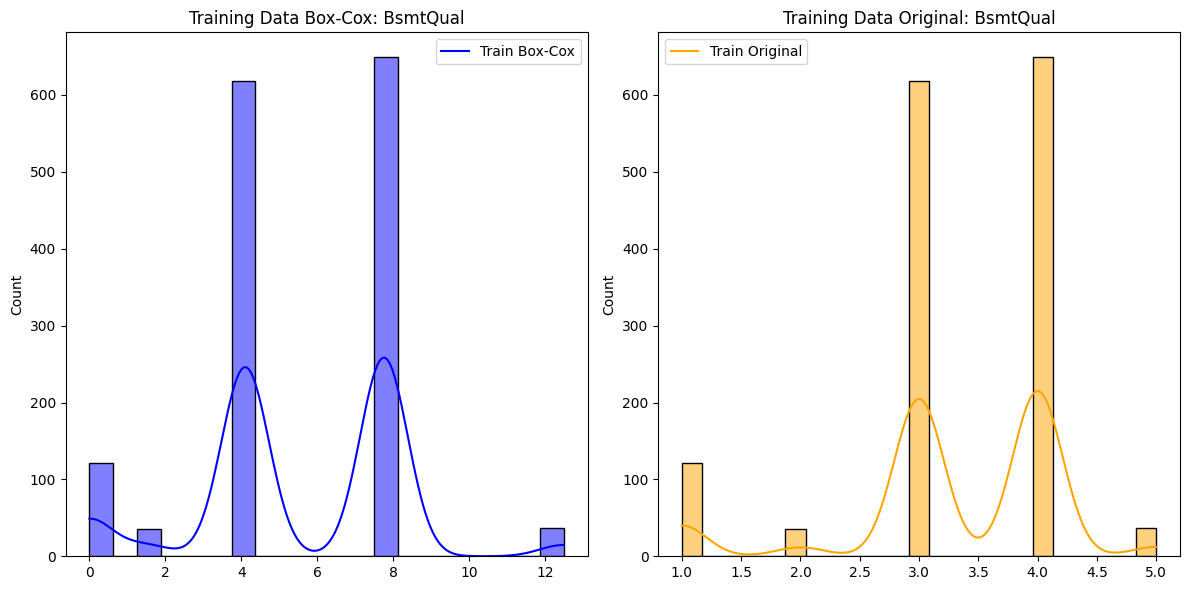

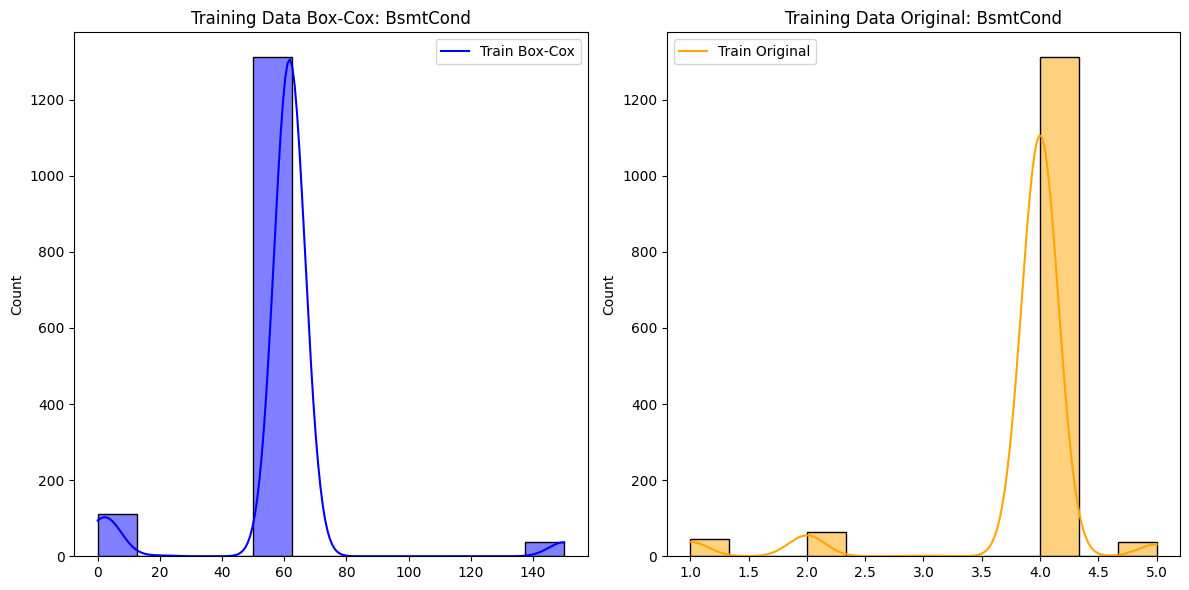

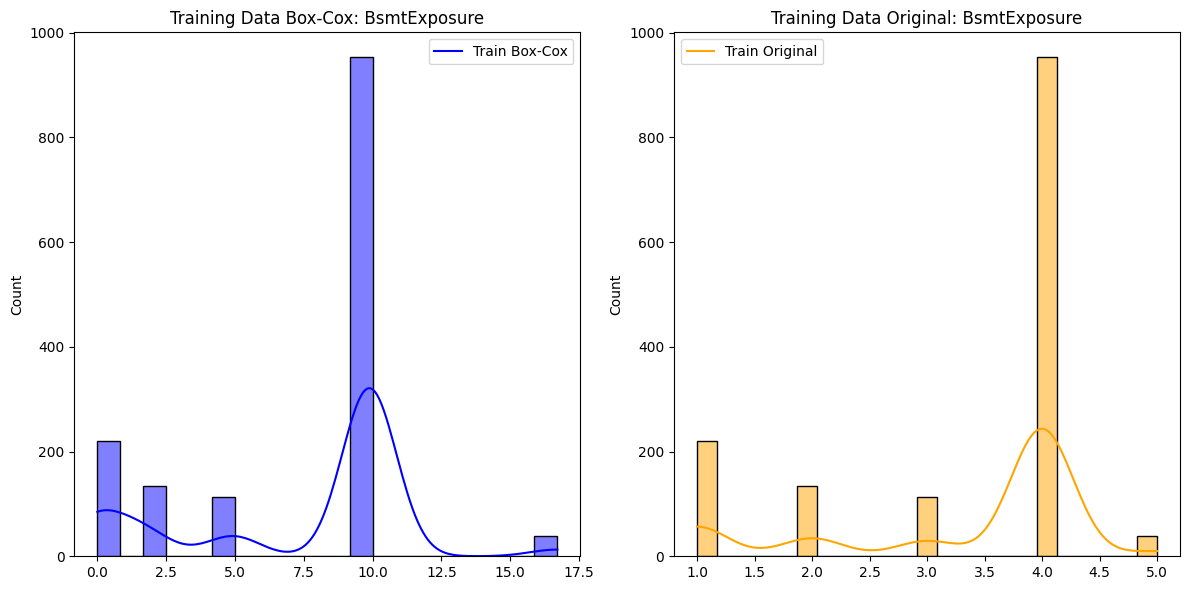

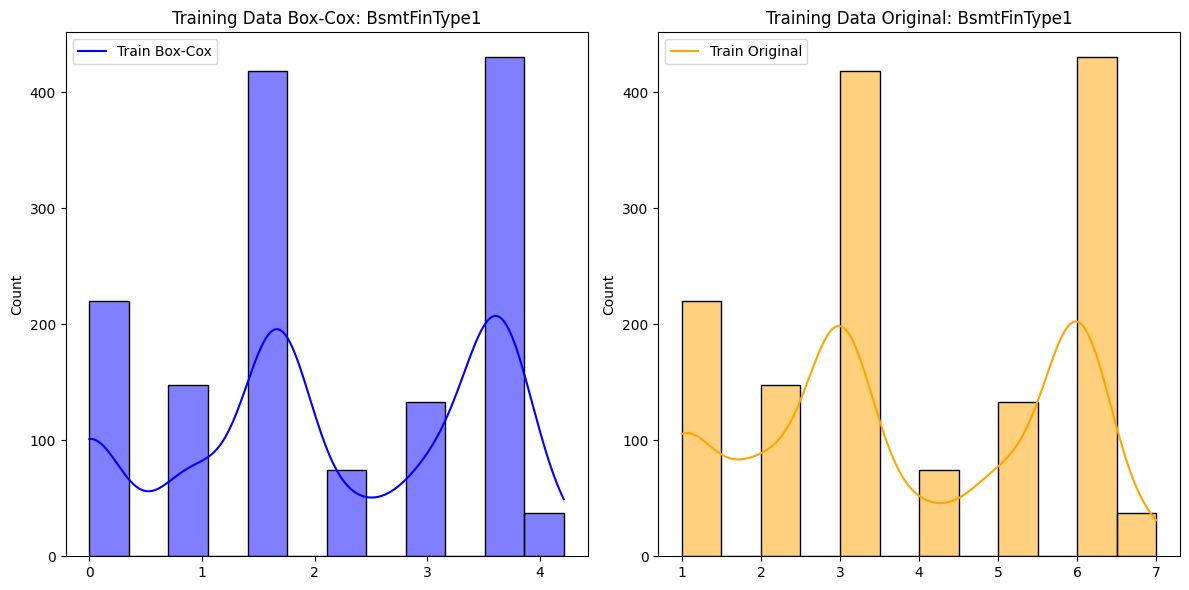

Error applying Box-Cox to data: All data must be positive for Box-Cox transformation.


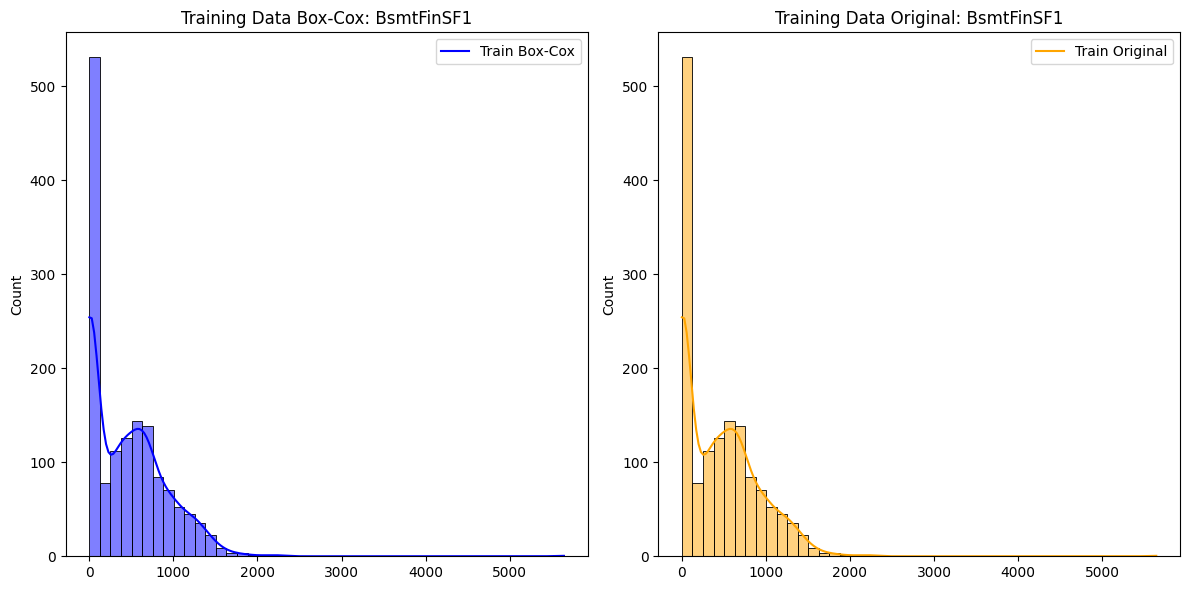

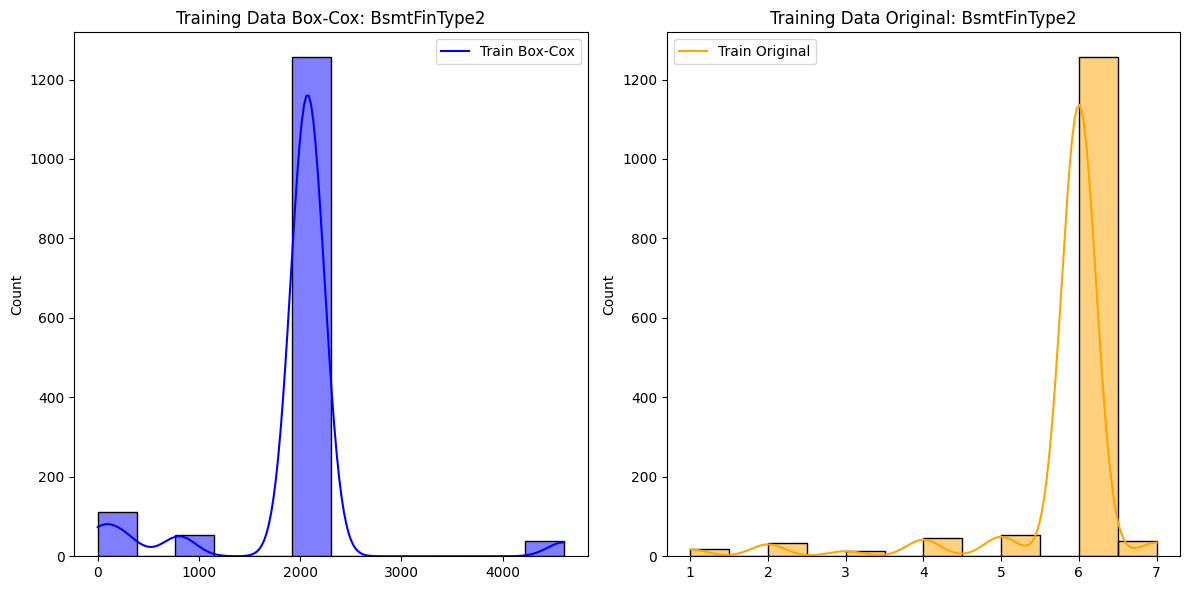

Error applying Box-Cox to data: All data must be positive for Box-Cox transformation.


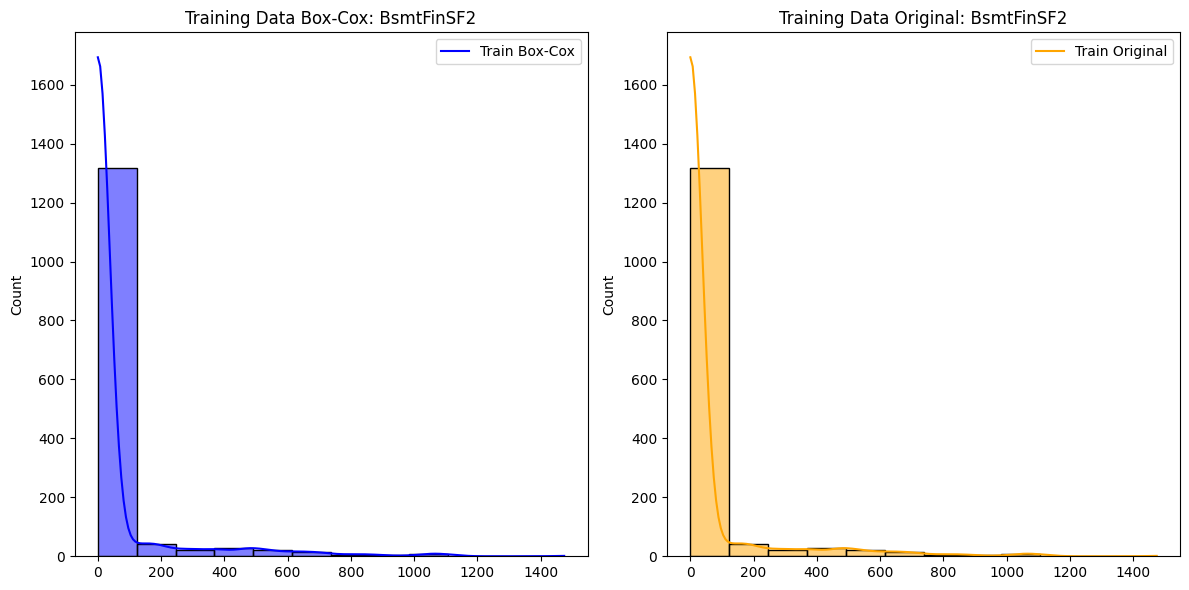

Error applying Box-Cox to data: All data must be positive for Box-Cox transformation.


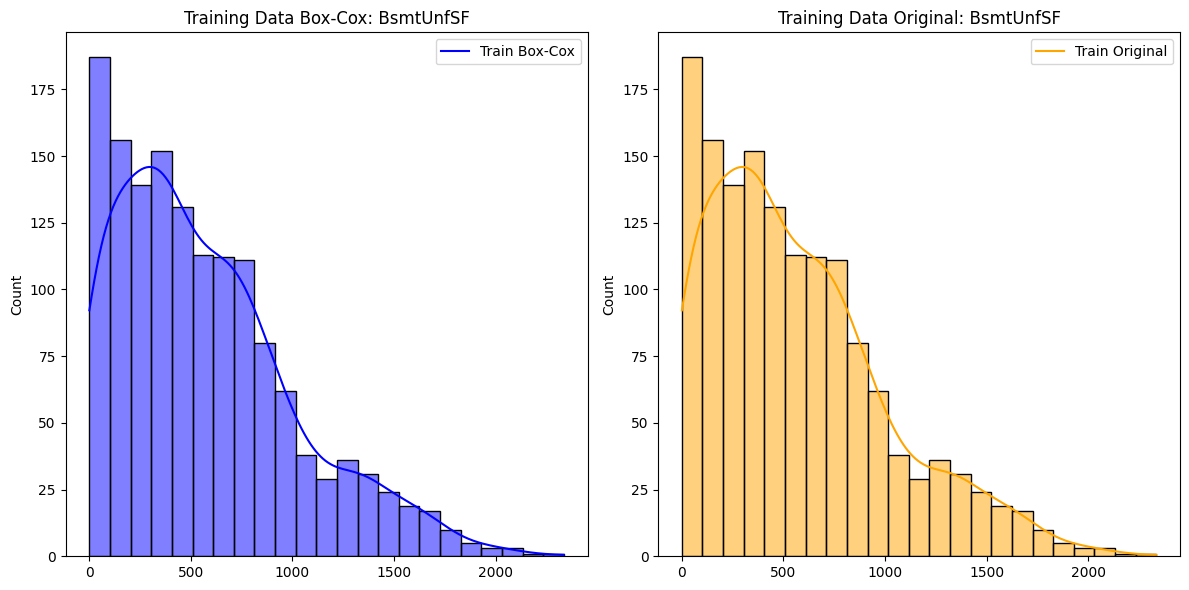

Error applying Box-Cox to data: All data must be positive for Box-Cox transformation.


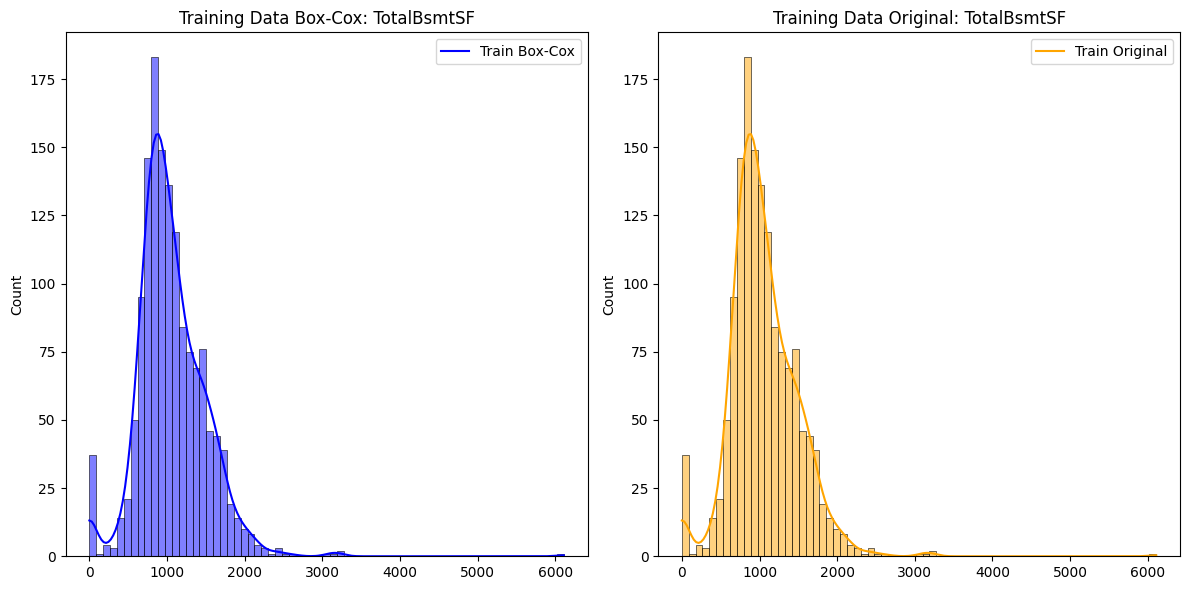

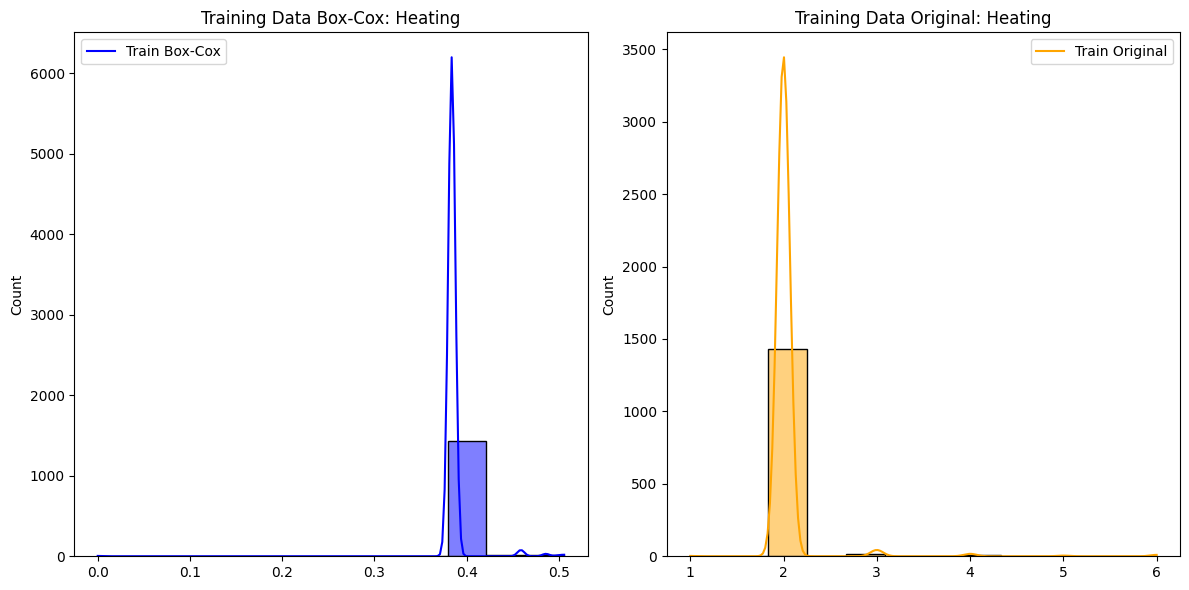

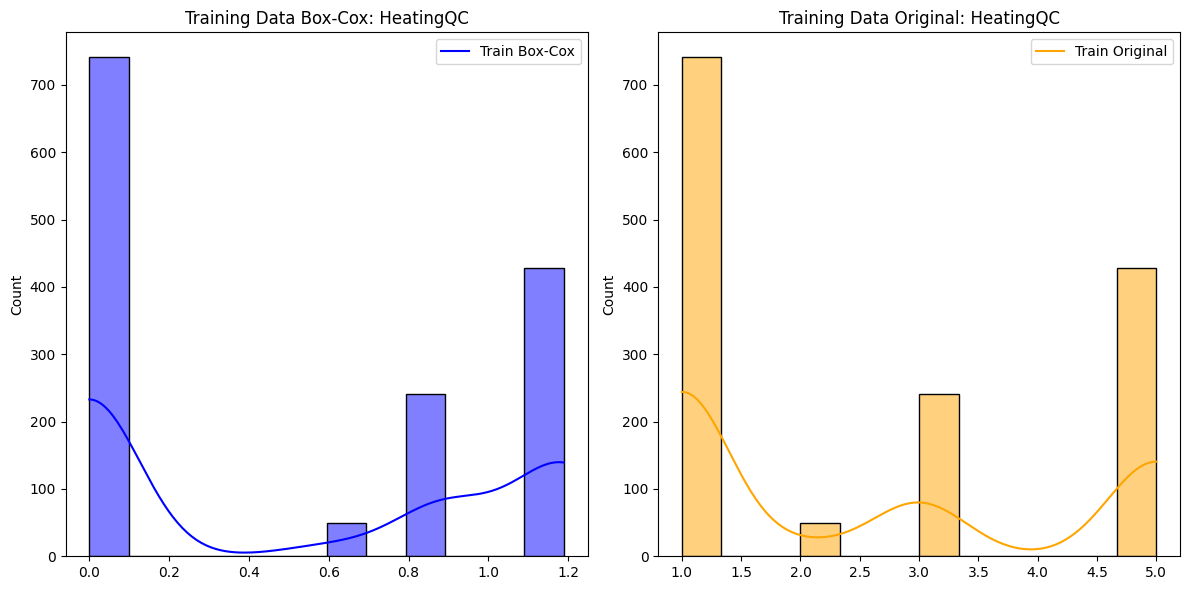

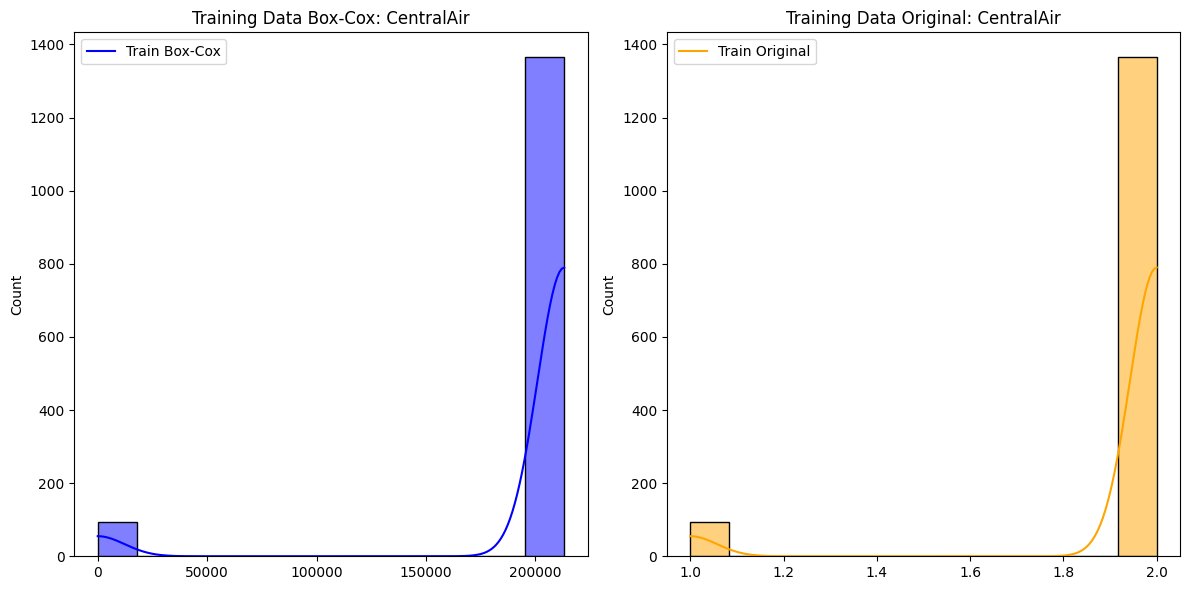

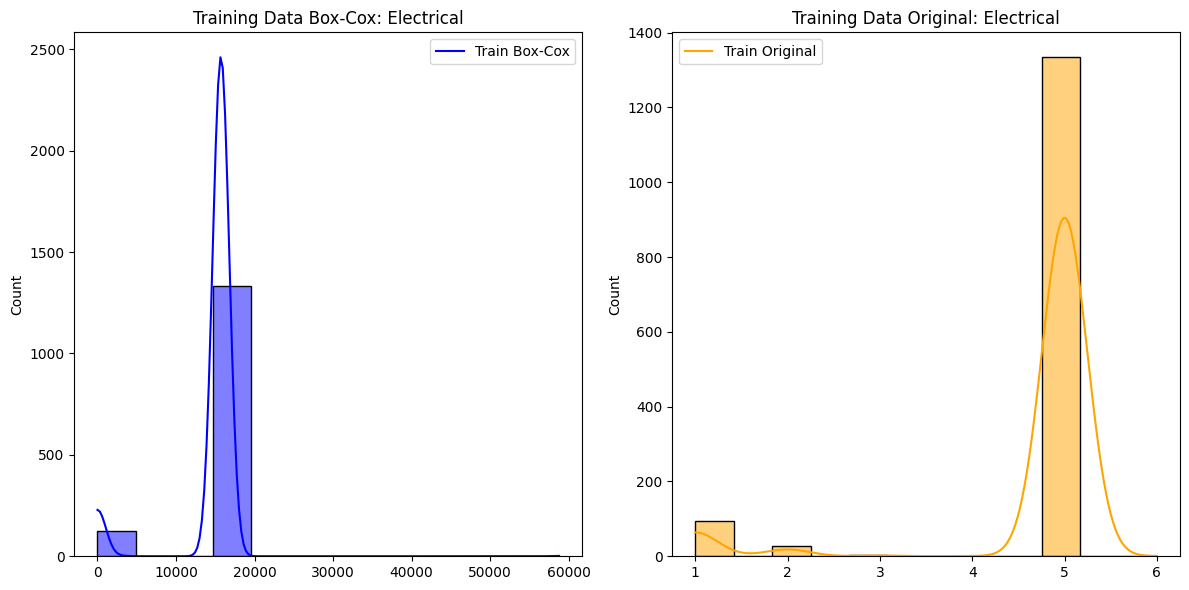

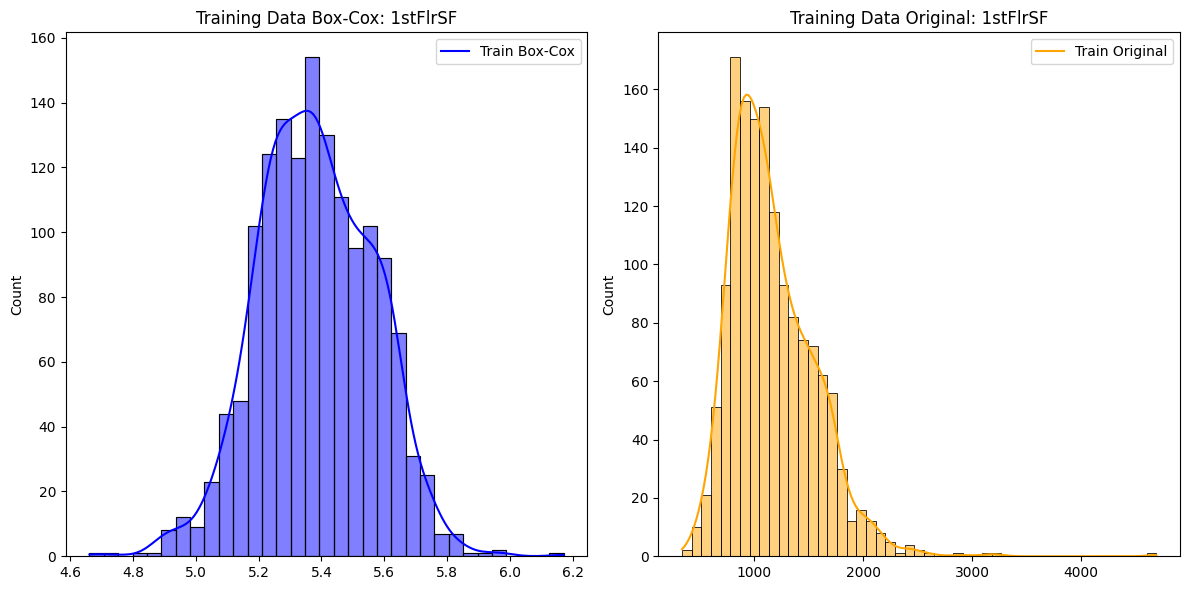

Error applying Box-Cox to data: All data must be positive for Box-Cox transformation.


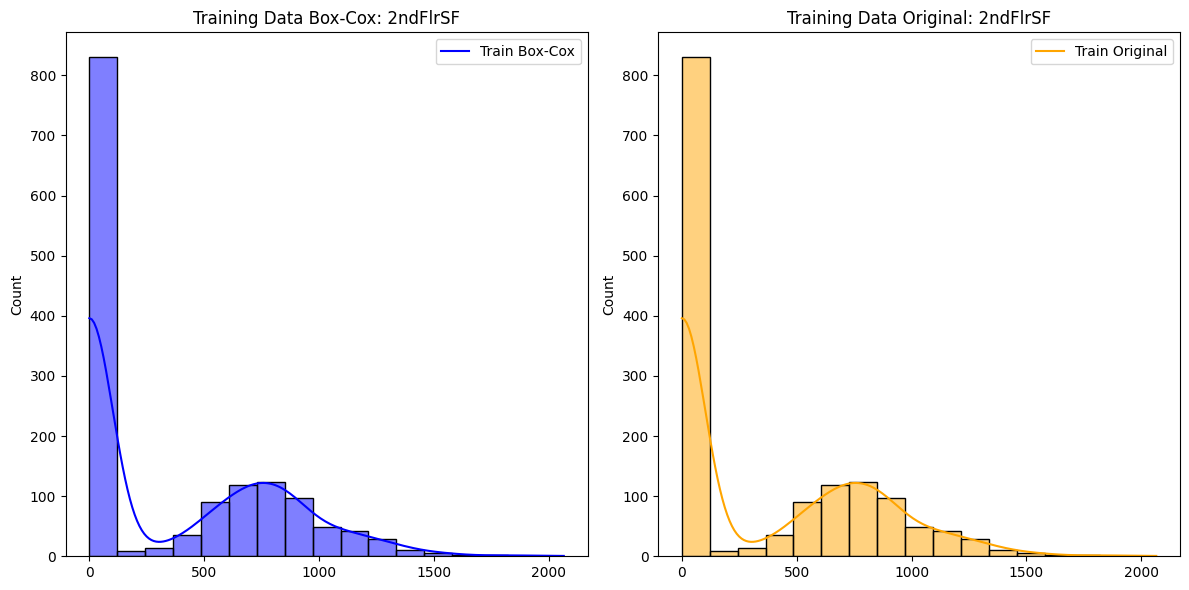

Error applying Box-Cox to data: All data must be positive for Box-Cox transformation.


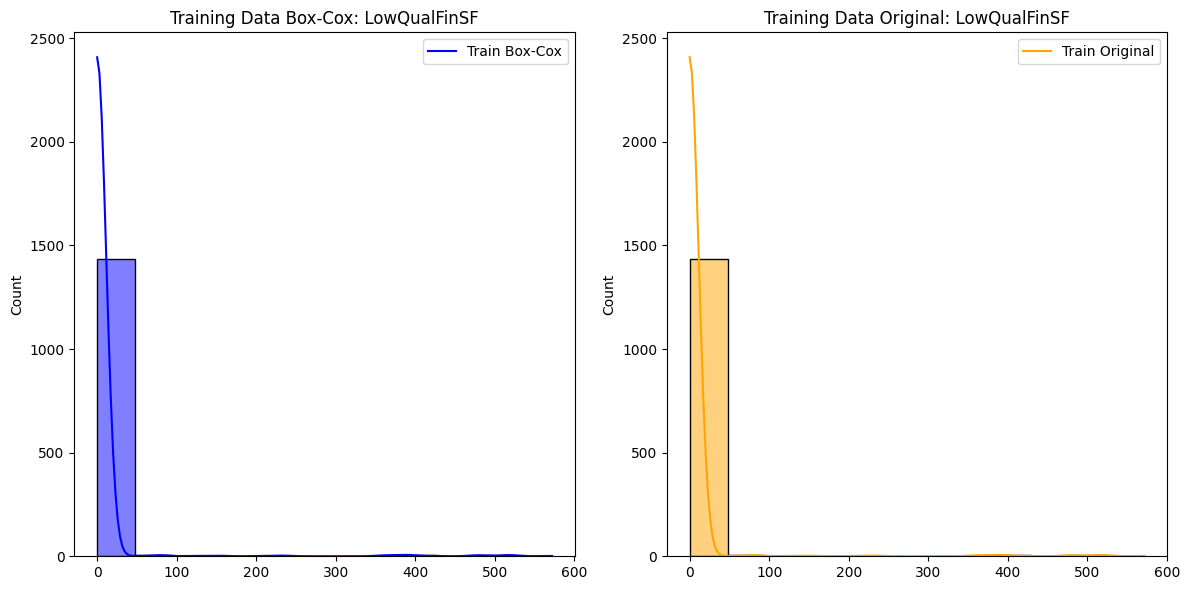

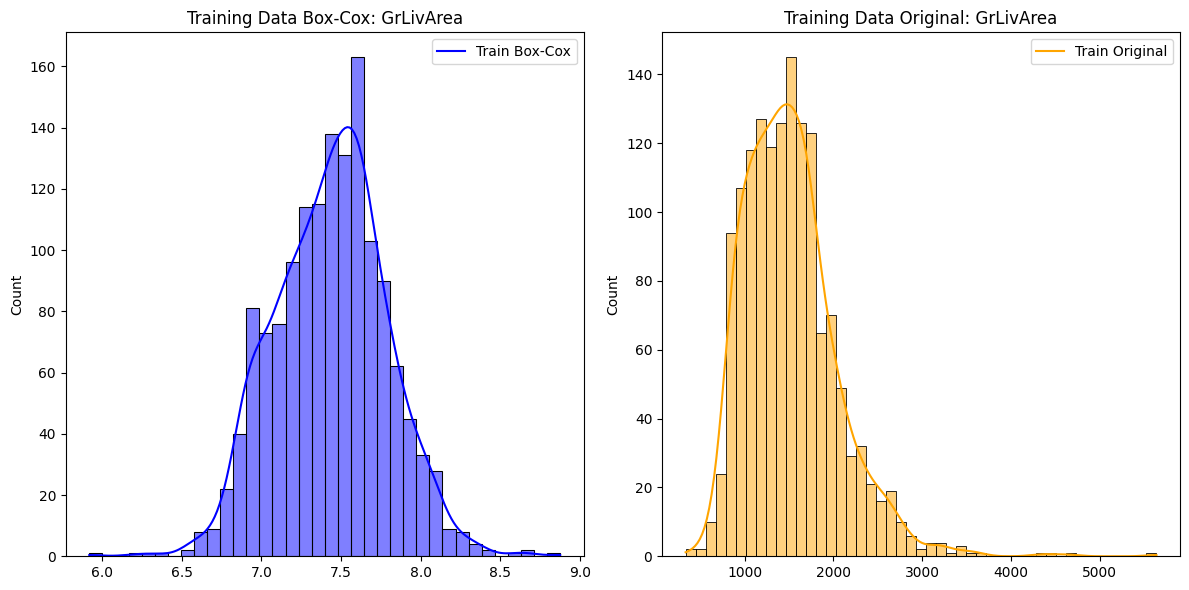

Error applying Box-Cox to data: All data must be positive for Box-Cox transformation.


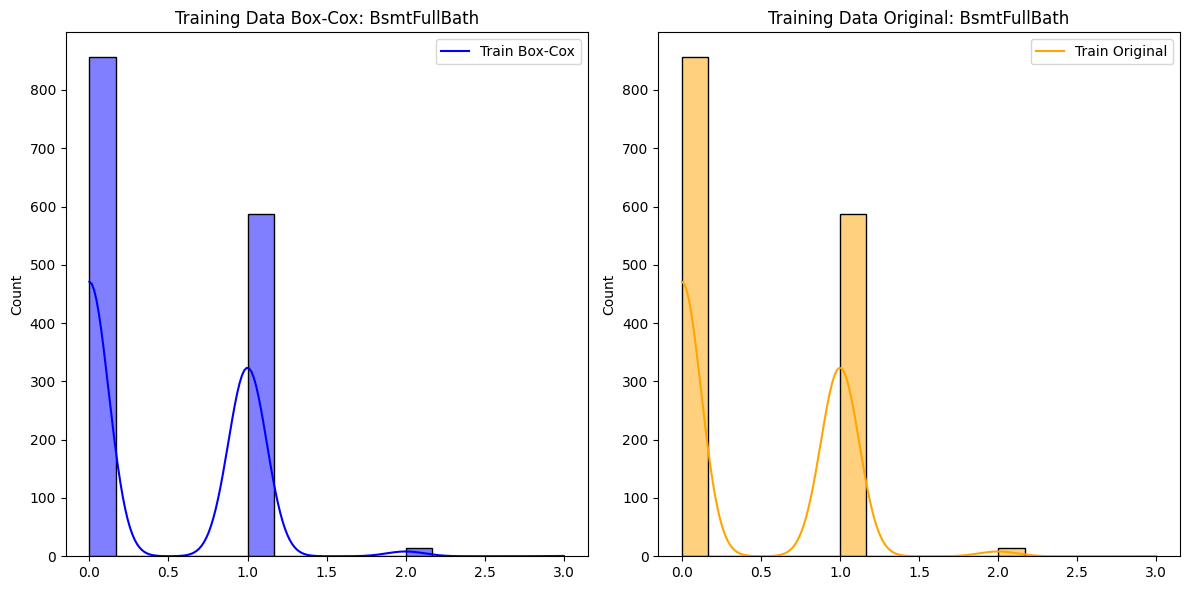

Error applying Box-Cox to data: All data must be positive for Box-Cox transformation.


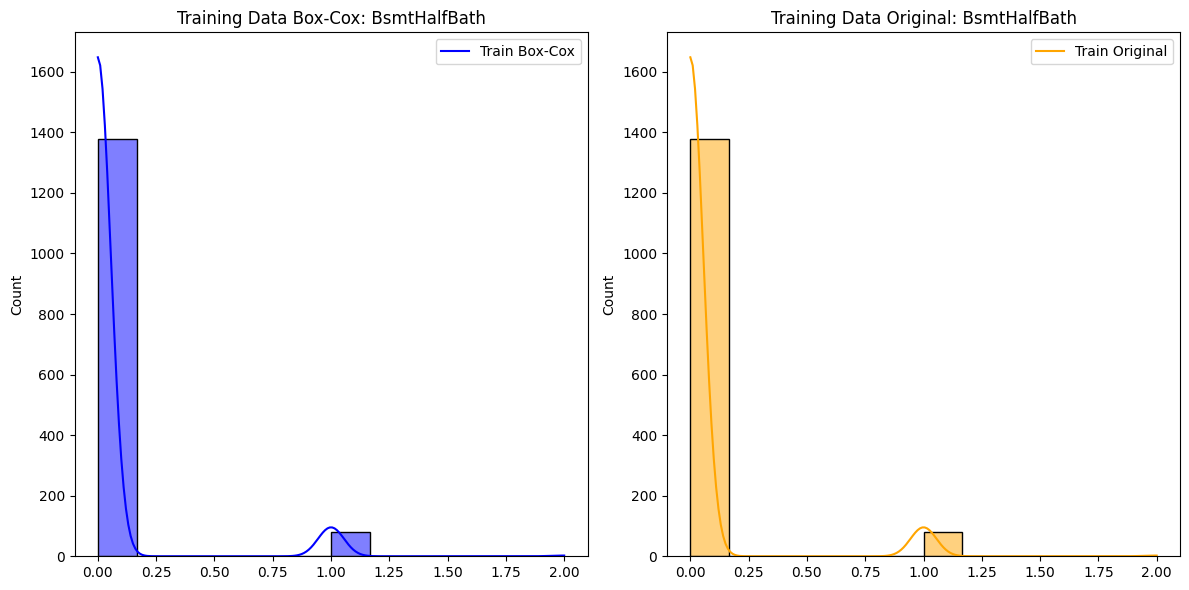

Error applying Box-Cox to data: All data must be positive for Box-Cox transformation.


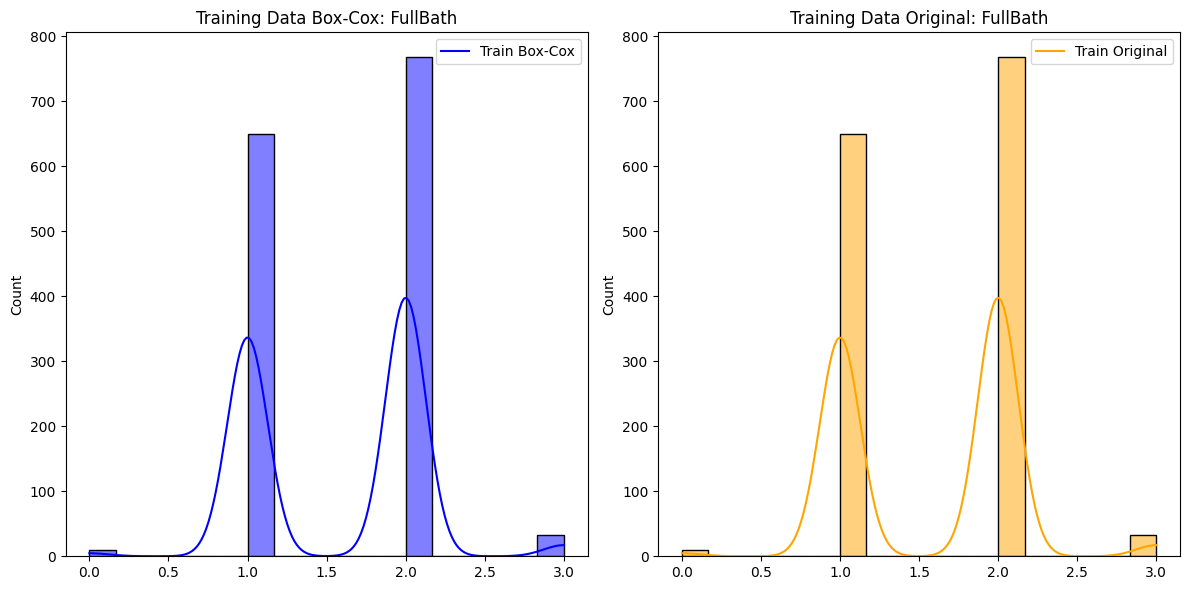

Error applying Box-Cox to data: All data must be positive for Box-Cox transformation.


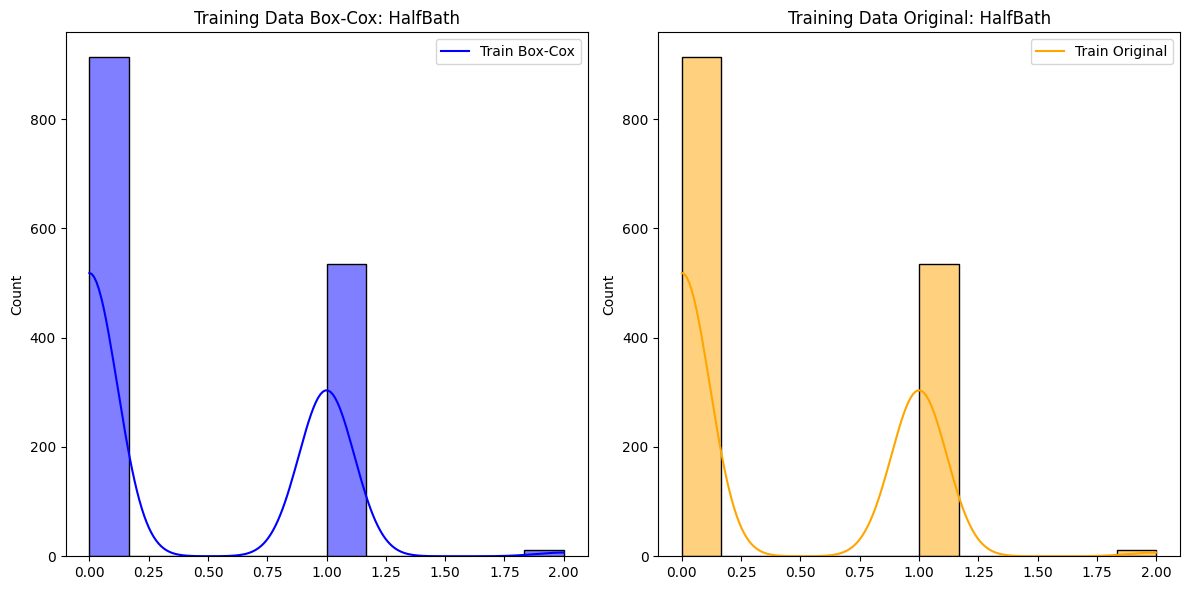

Error applying Box-Cox to data: All data must be positive for Box-Cox transformation.


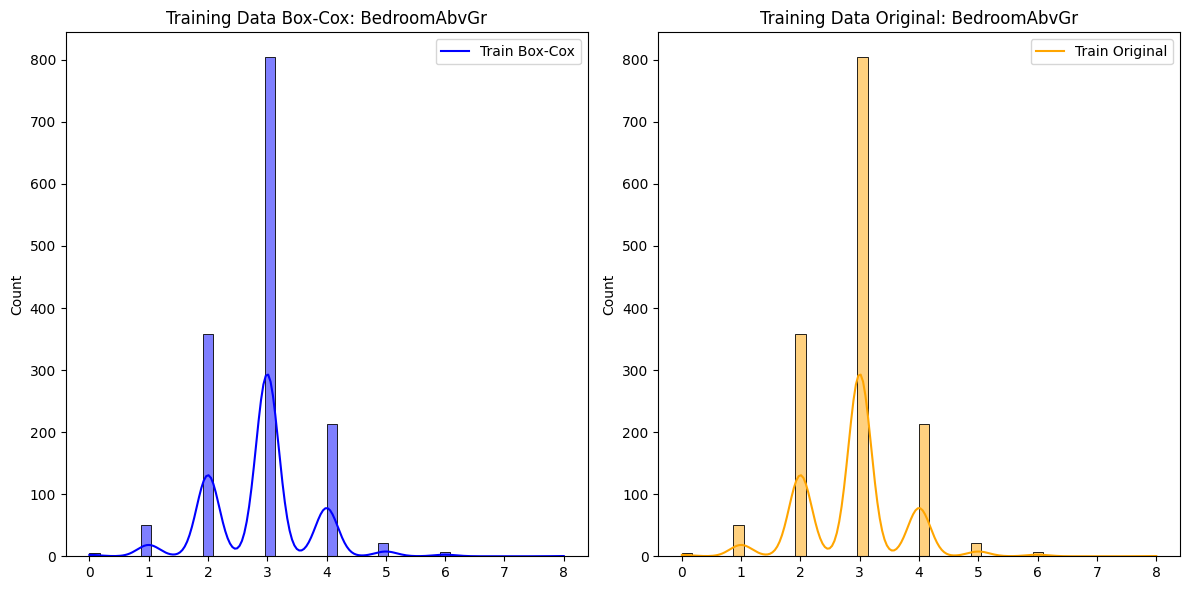

Error applying Box-Cox to data: All data must be positive for Box-Cox transformation.


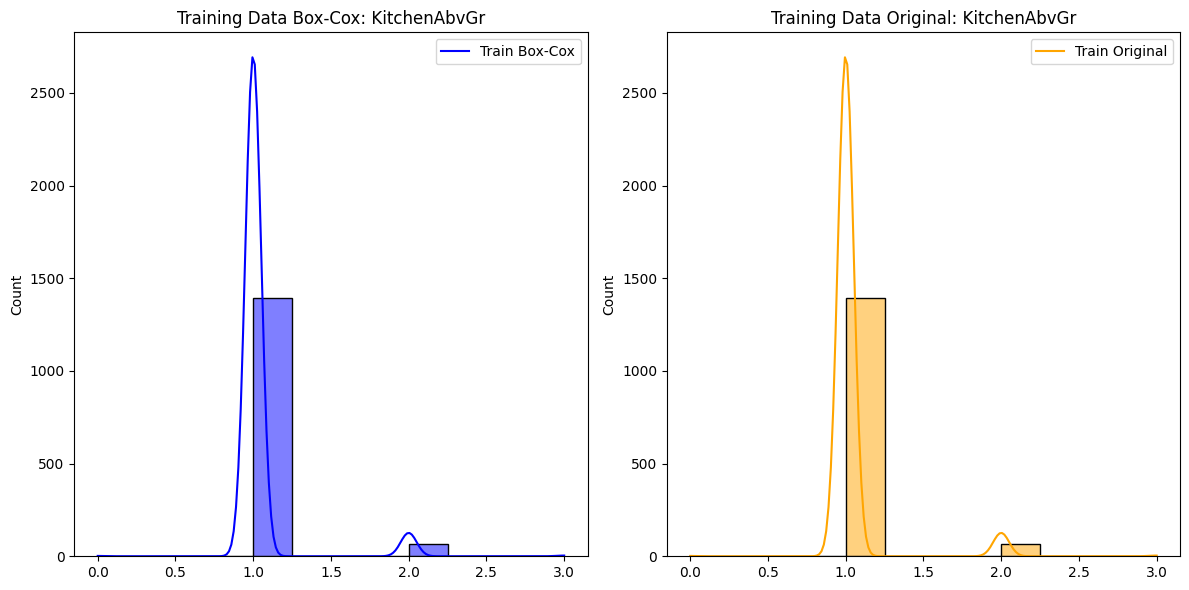

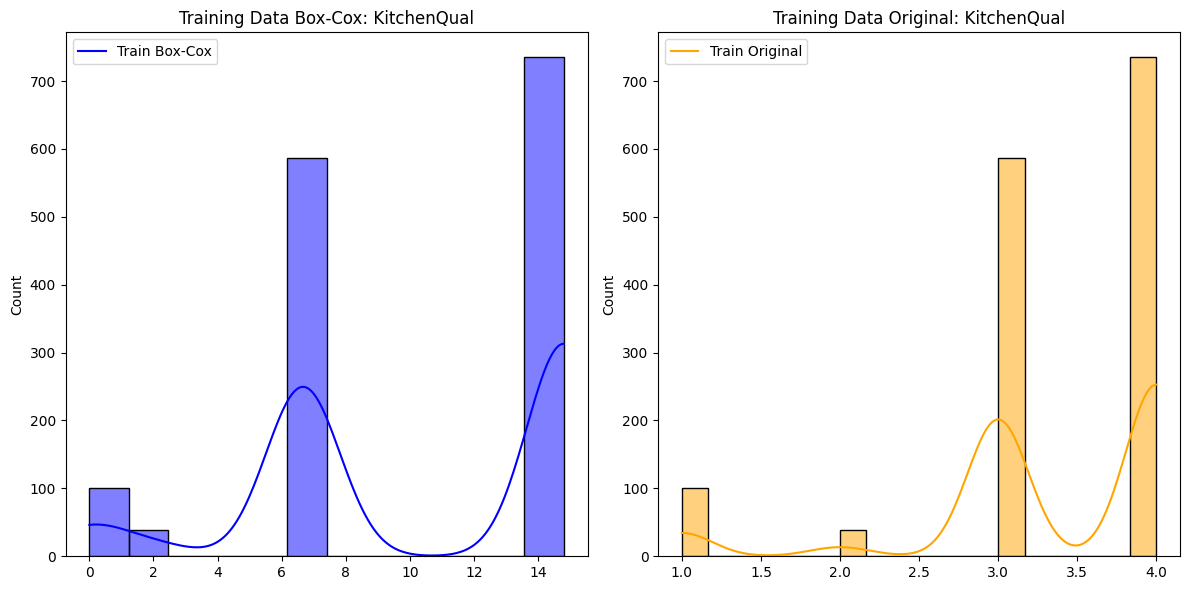

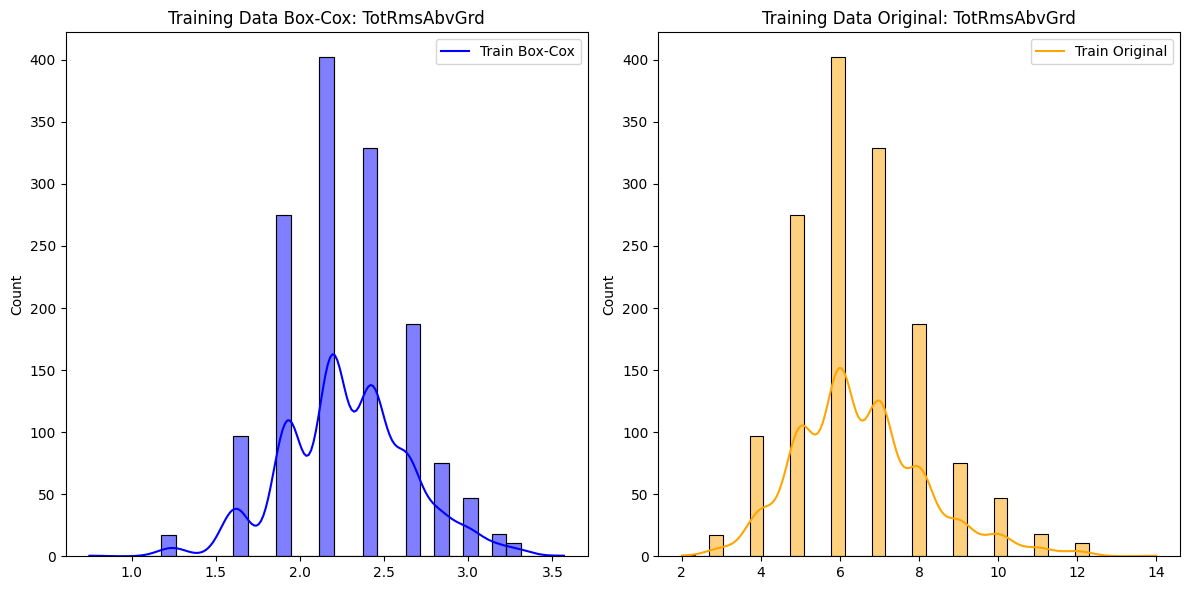

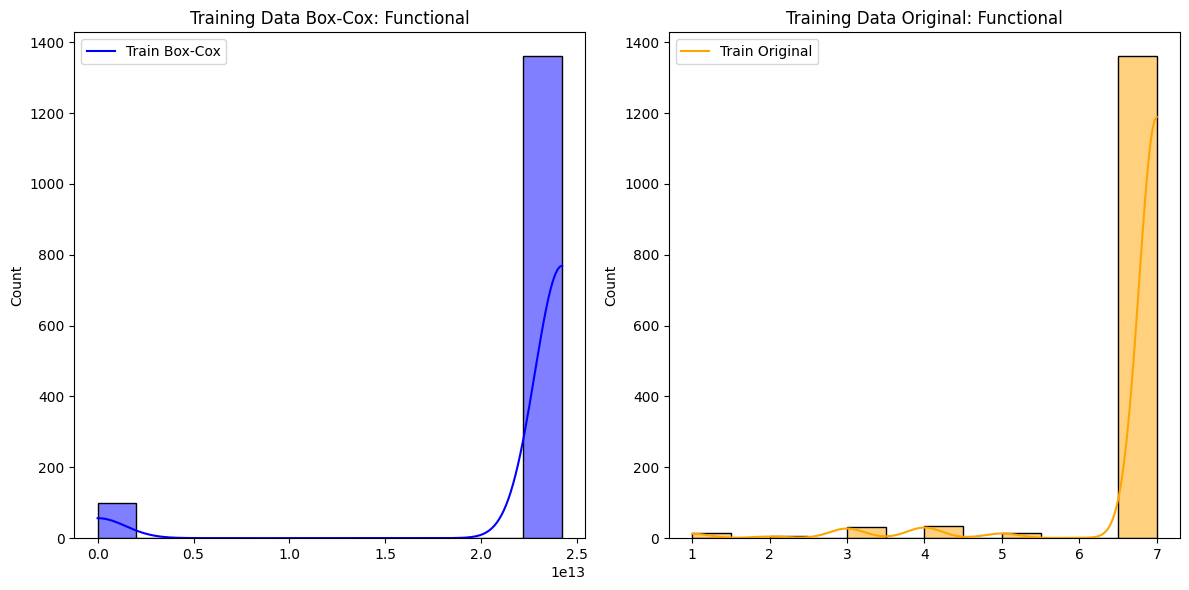

Error applying Box-Cox to data: All data must be positive for Box-Cox transformation.


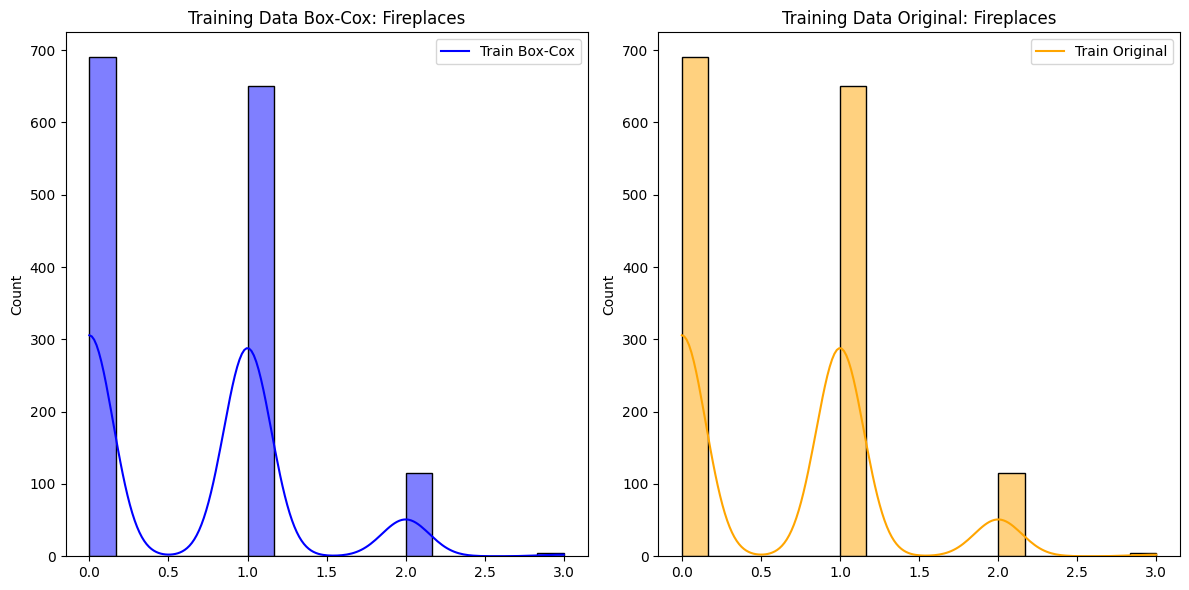

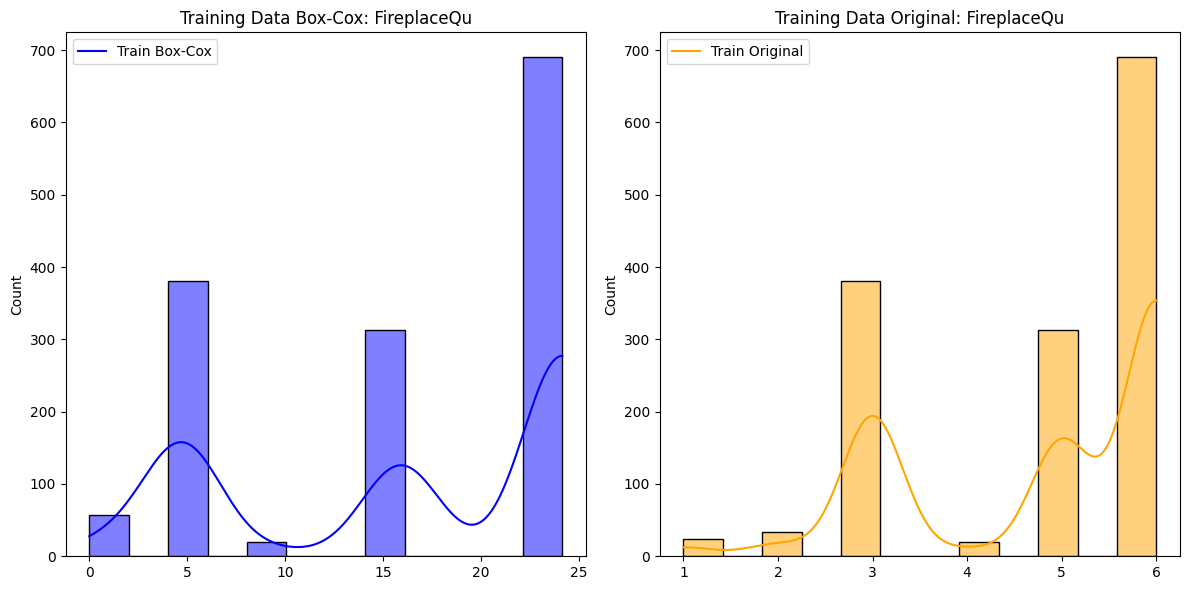

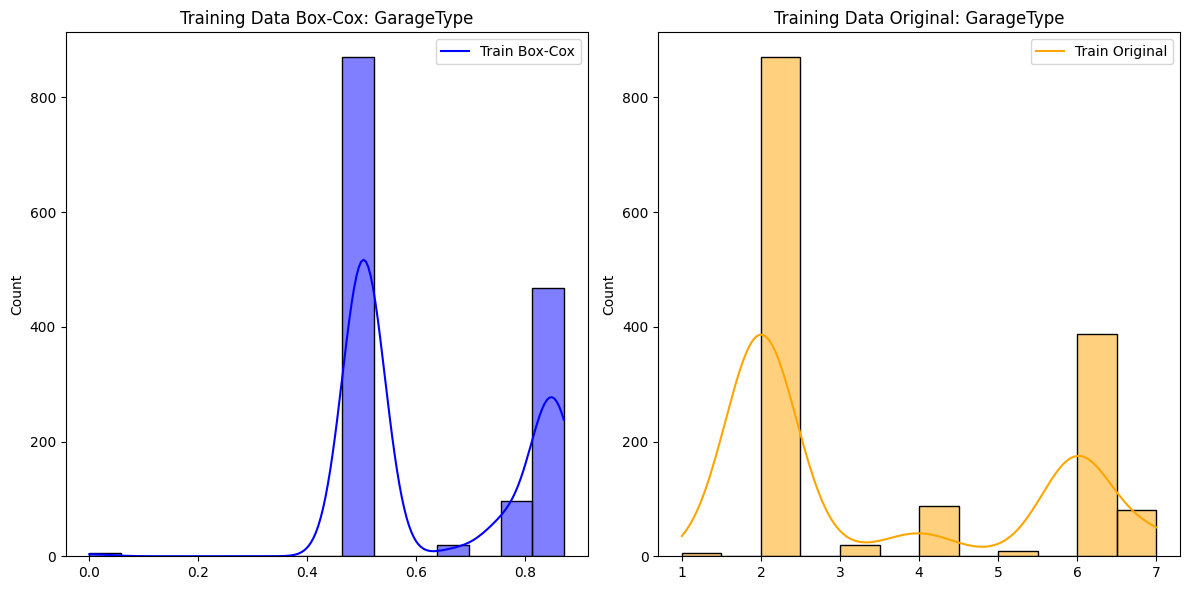

Error applying Box-Cox to data: The algorithm terminated without finding a valid bracket. Consider trying different initial points.


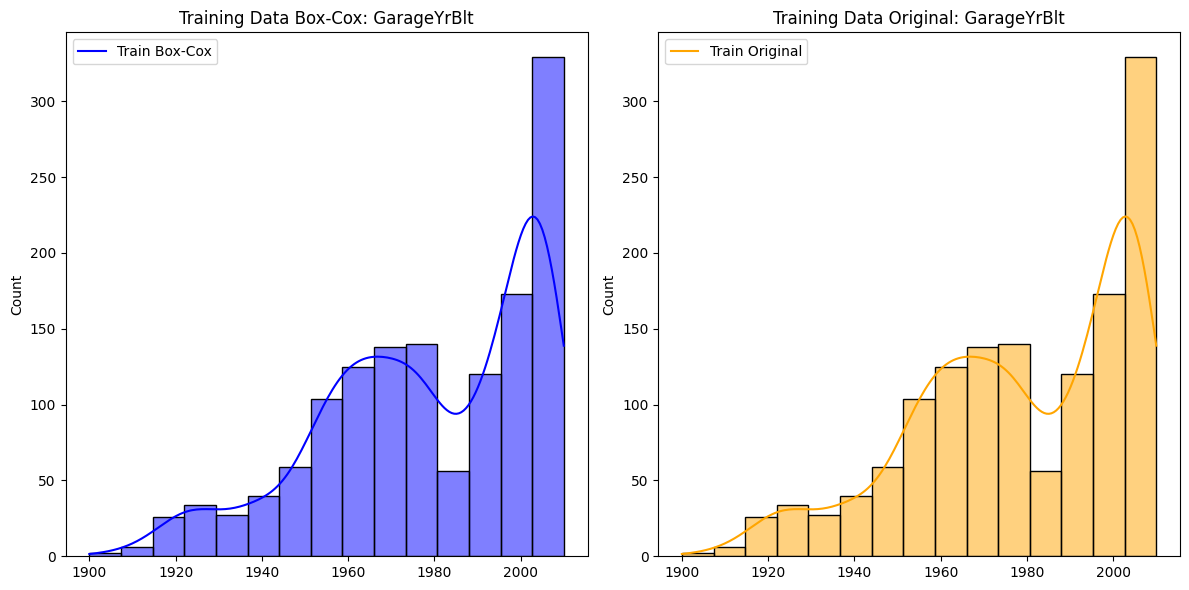

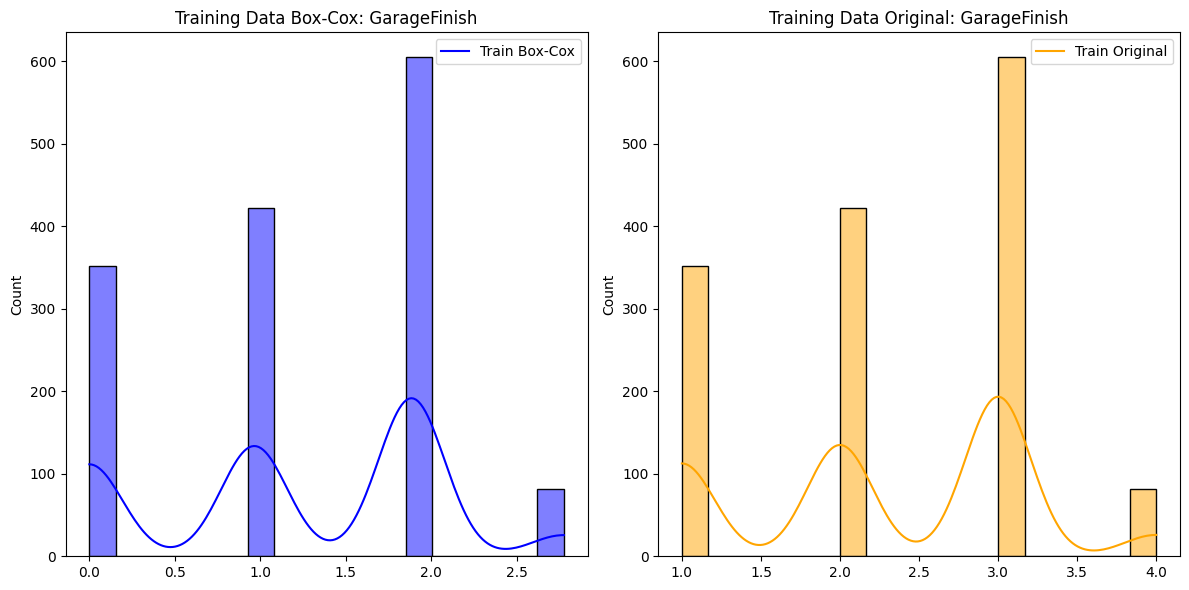

Error applying Box-Cox to data: All data must be positive for Box-Cox transformation.


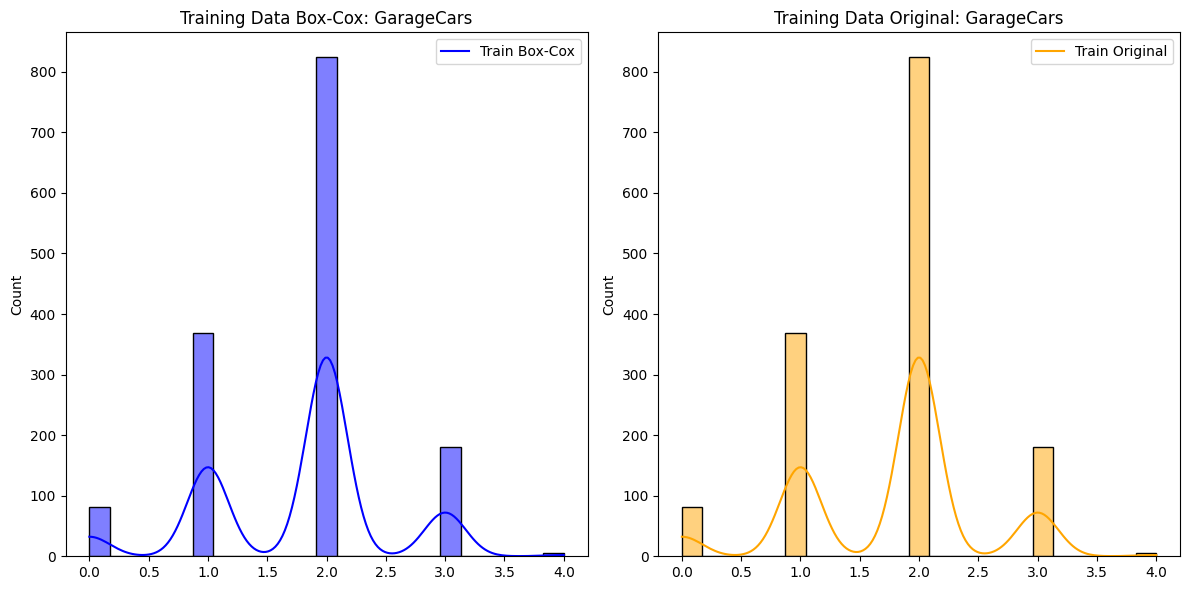

Error applying Box-Cox to data: All data must be positive for Box-Cox transformation.


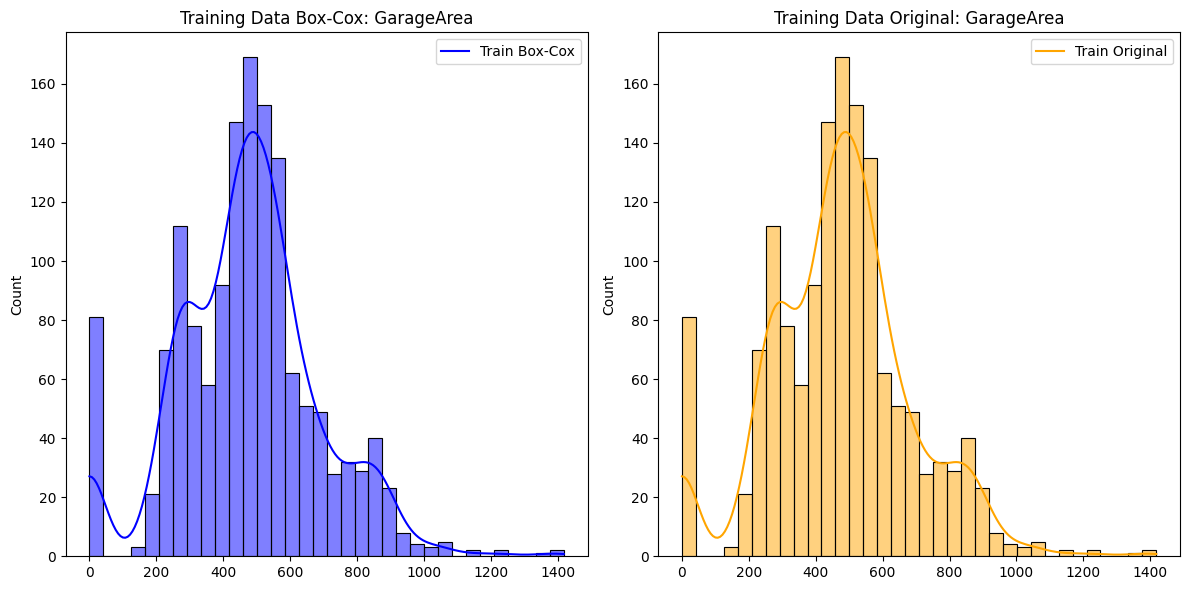

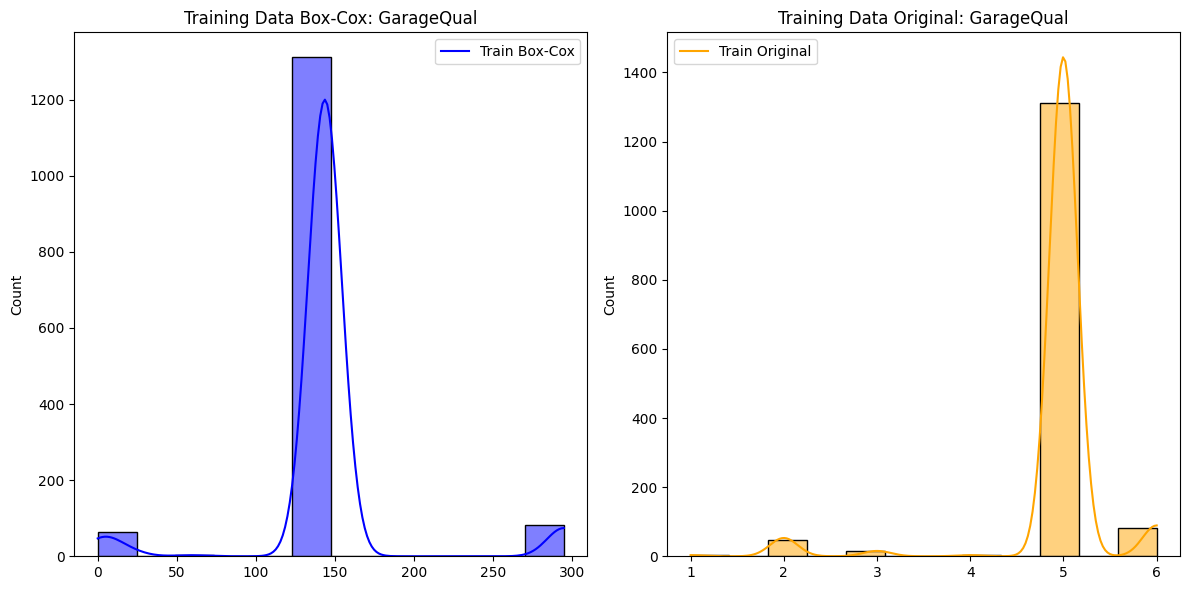

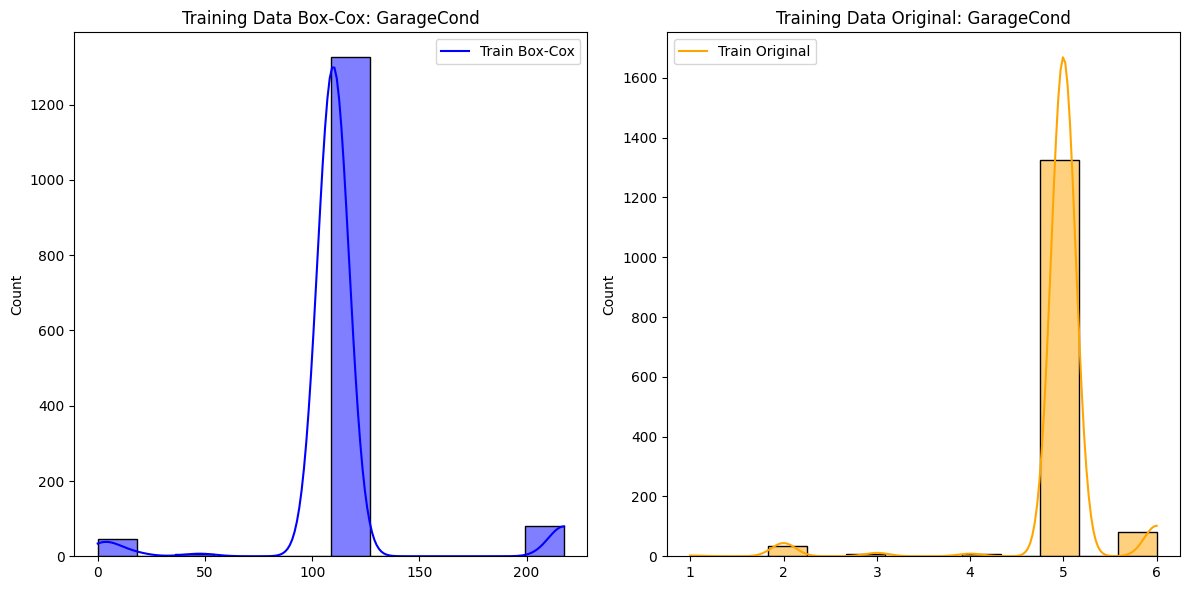

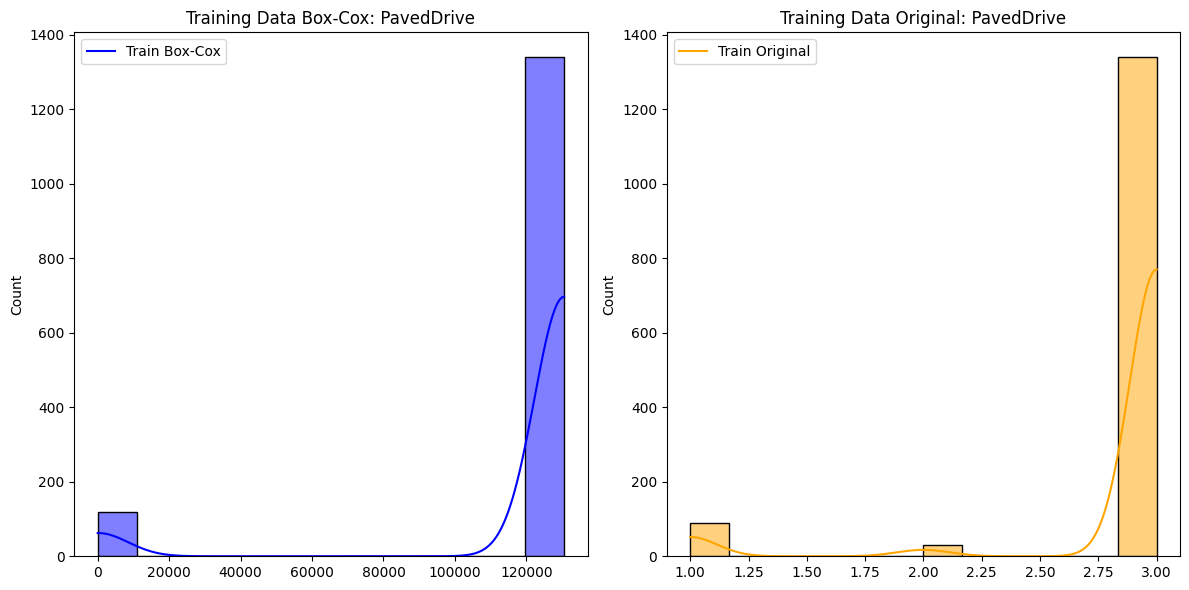

Error applying Box-Cox to data: All data must be positive for Box-Cox transformation.


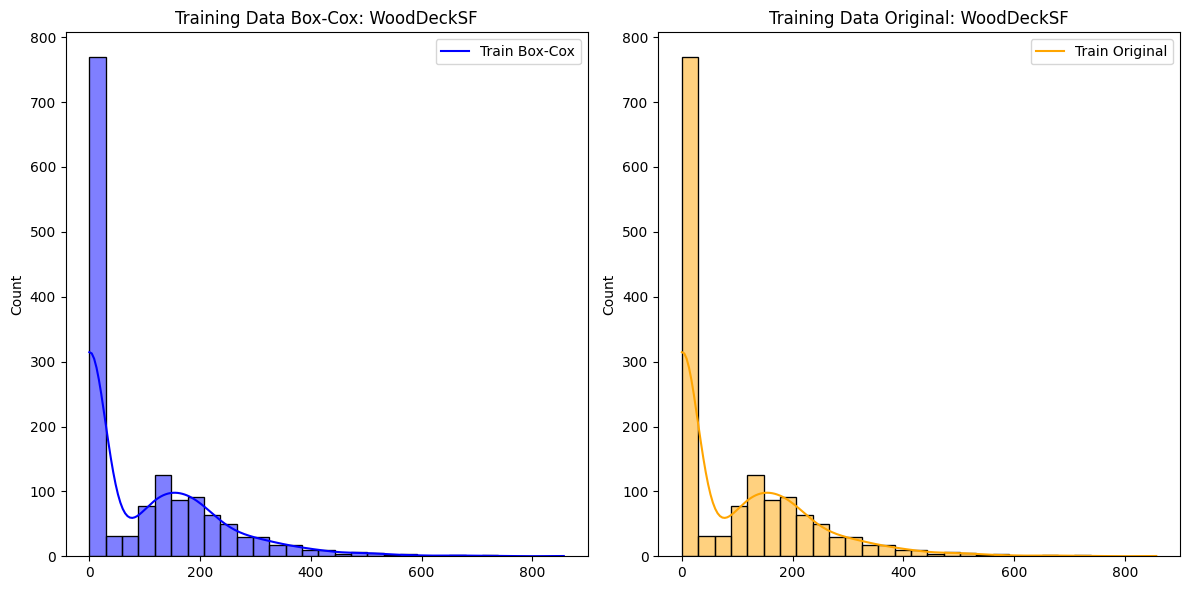

Error applying Box-Cox to data: All data must be positive for Box-Cox transformation.


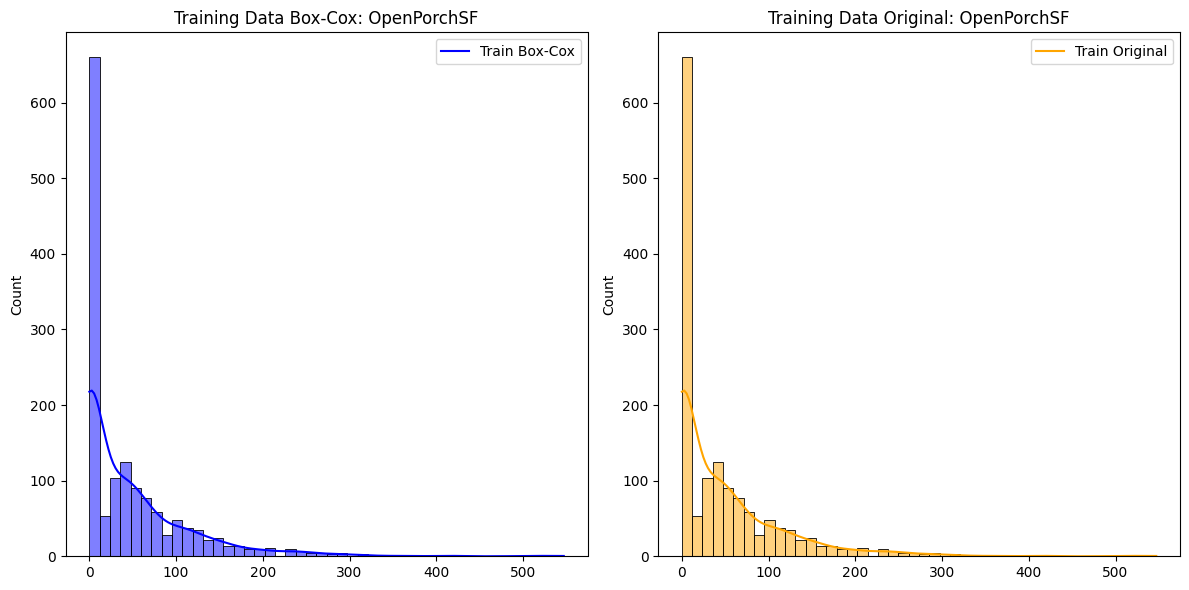

Error applying Box-Cox to data: All data must be positive for Box-Cox transformation.


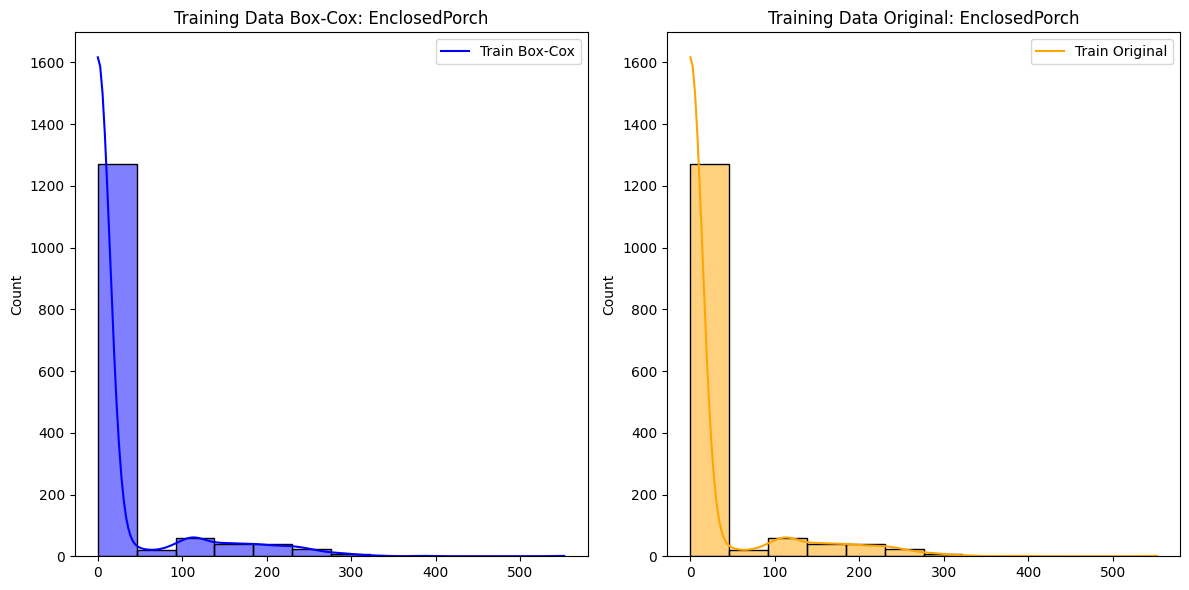

Error applying Box-Cox to data: All data must be positive for Box-Cox transformation.


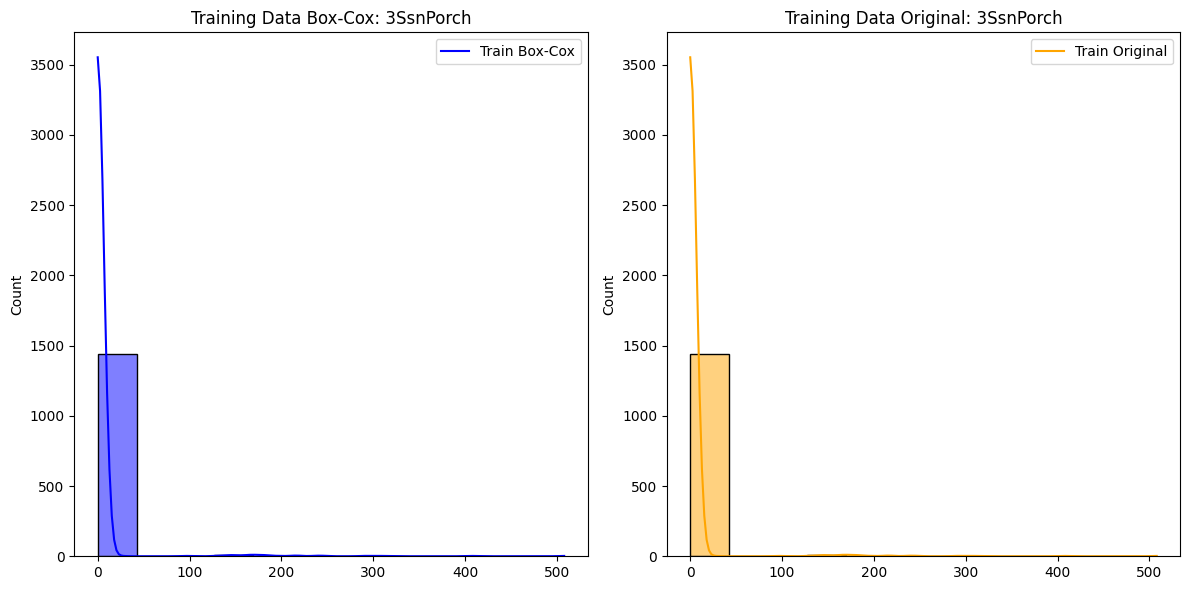

Error applying Box-Cox to data: All data must be positive for Box-Cox transformation.


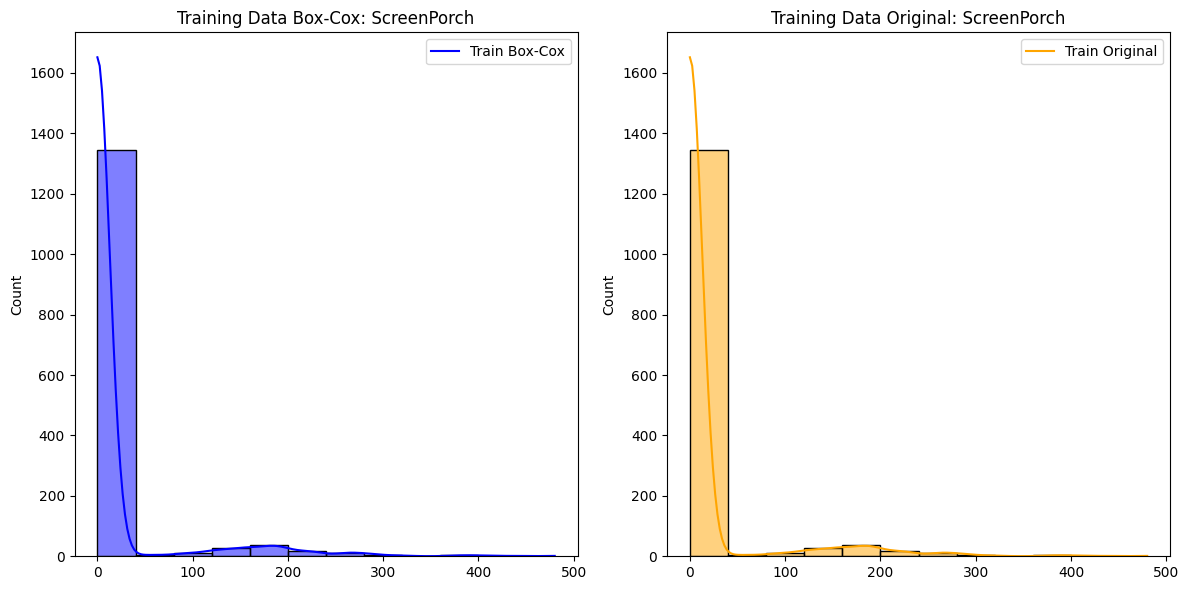

Error applying Box-Cox to data: All data must be positive for Box-Cox transformation.


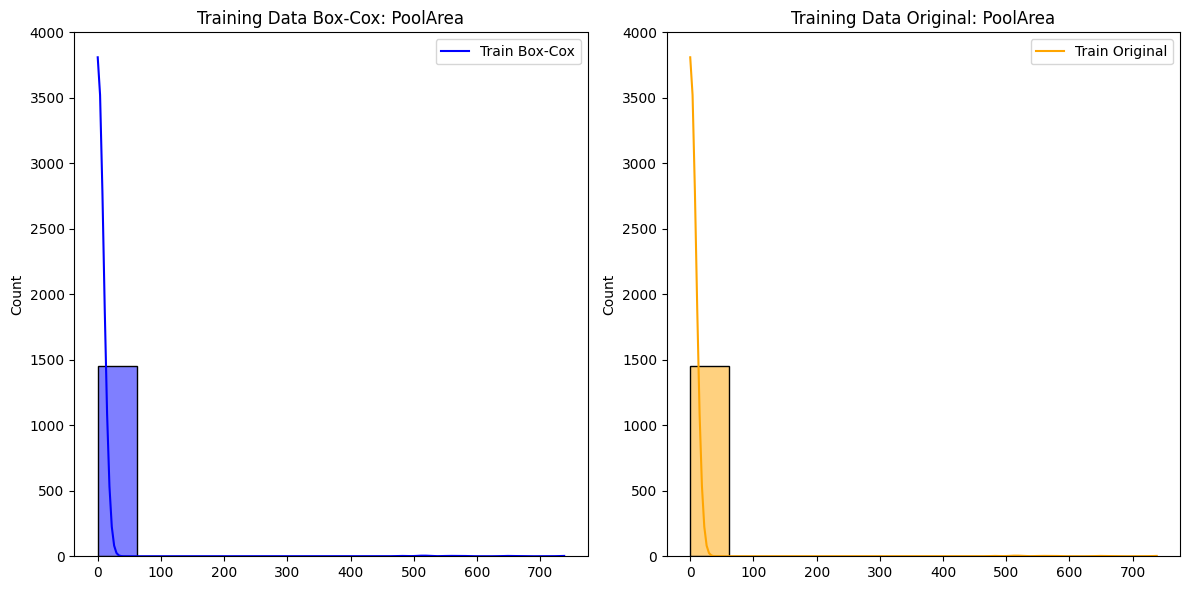

C:\Users\yixin\AppData\Roaming\Python\Python310\site-packages\numpy\core\_methods.py:176: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\yixin\AppData\Roaming\Python\Python310\site-packages\numpy\core\_methods.py:187: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


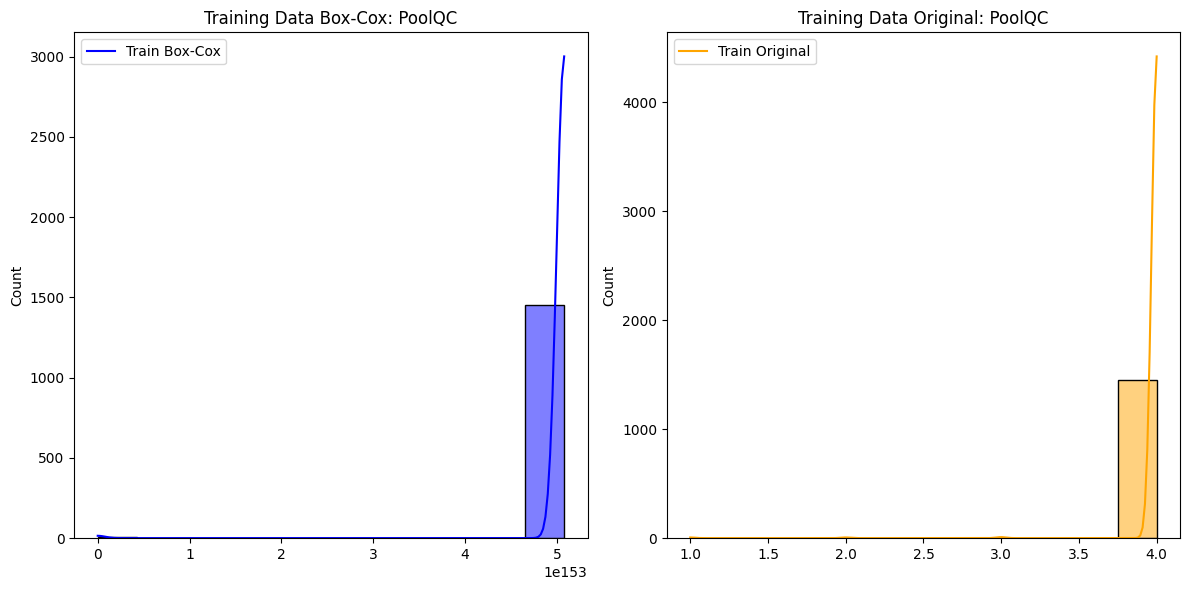

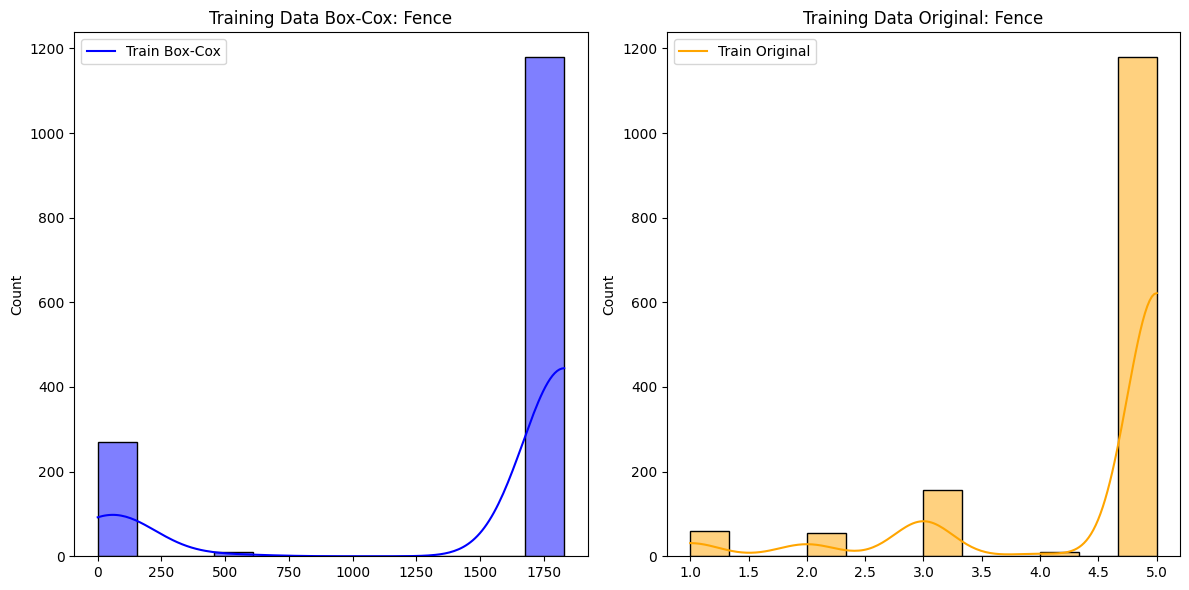

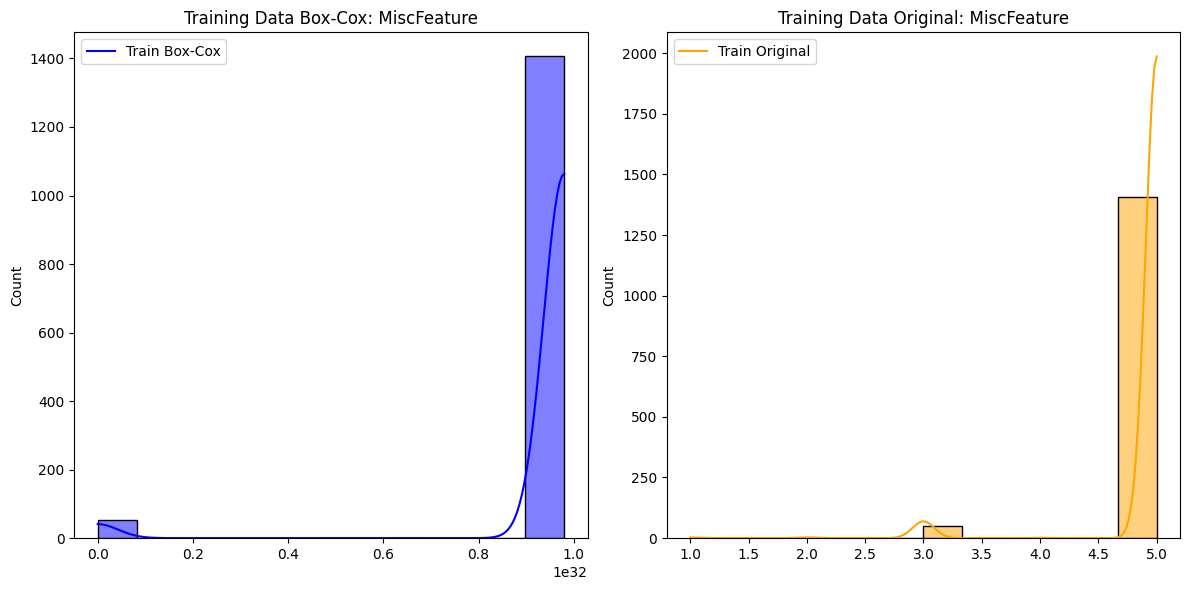

Error applying Box-Cox to data: All data must be positive for Box-Cox transformation.


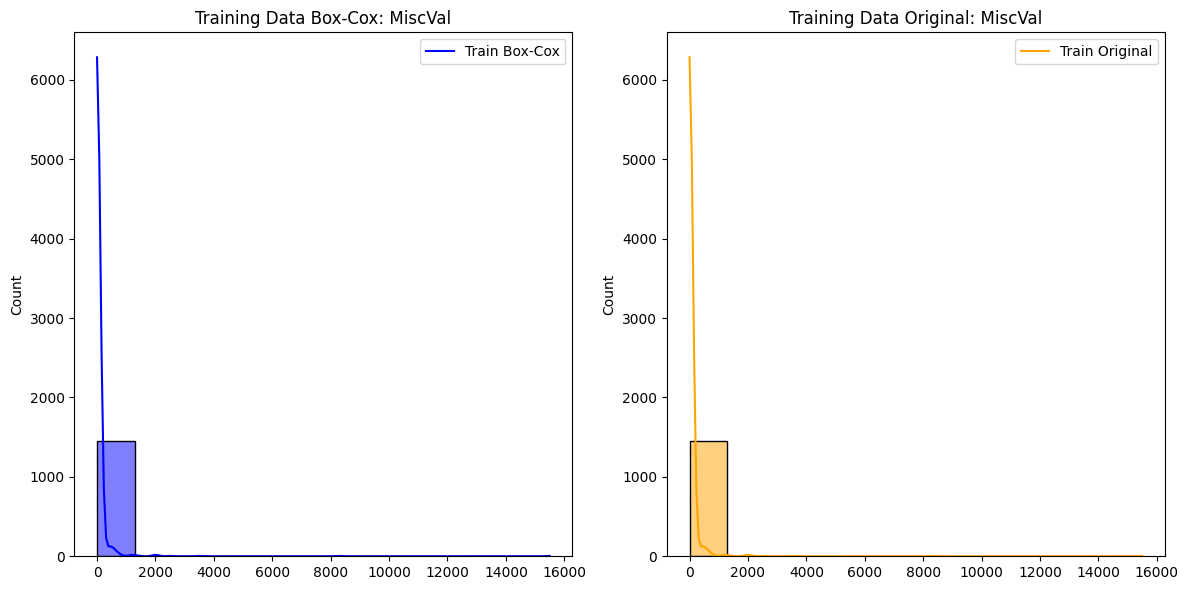

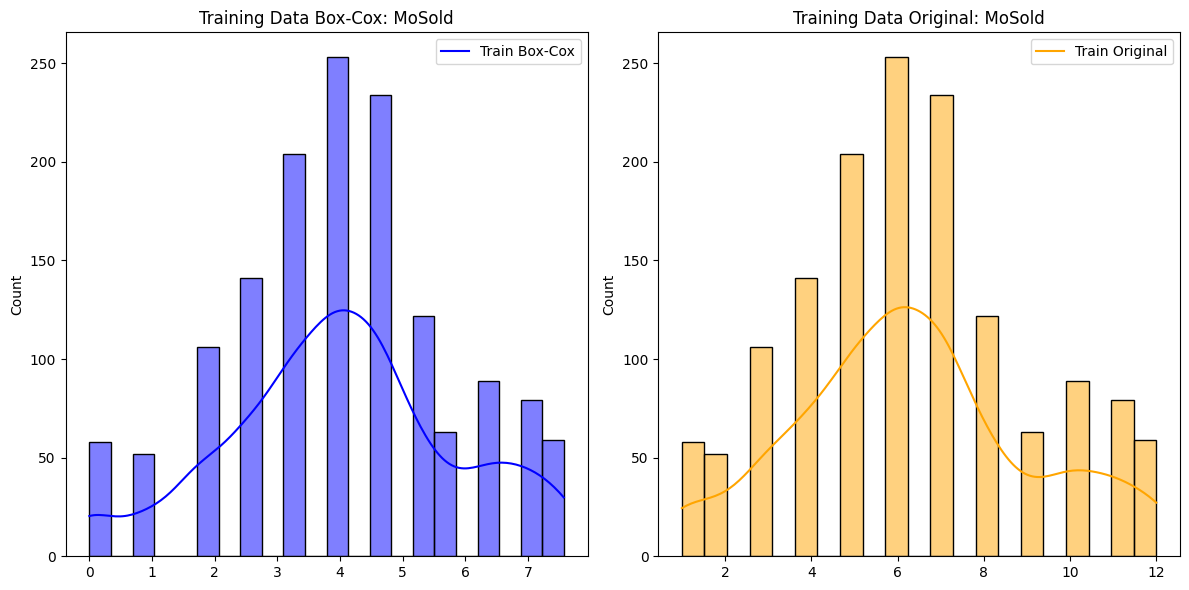

C:\Users\yixin\AppData\Roaming\Python\Python310\site-packages\scipy\stats\_morestats.py:935: RuntimeWarning: divide by zero encountered in log
  return (lmb - 1) * np.sum(logdata, axis=0) - N/2 * np.log(variance)
C:\Users\yixin\AppData\Roaming\Python\Python310\site-packages\scipy\optimize\_optimize.py:2488: RuntimeWarning: invalid value encountered in scalar subtract
  tmp1 = (x - w) * (fx - fv)
C:\Users\yixin\AppData\Roaming\Python\Python310\site-packages\scipy\optimize\_optimize.py:2489: RuntimeWarning: invalid value encountered in scalar subtract
  tmp2 = (x - v) * (fx - fw)


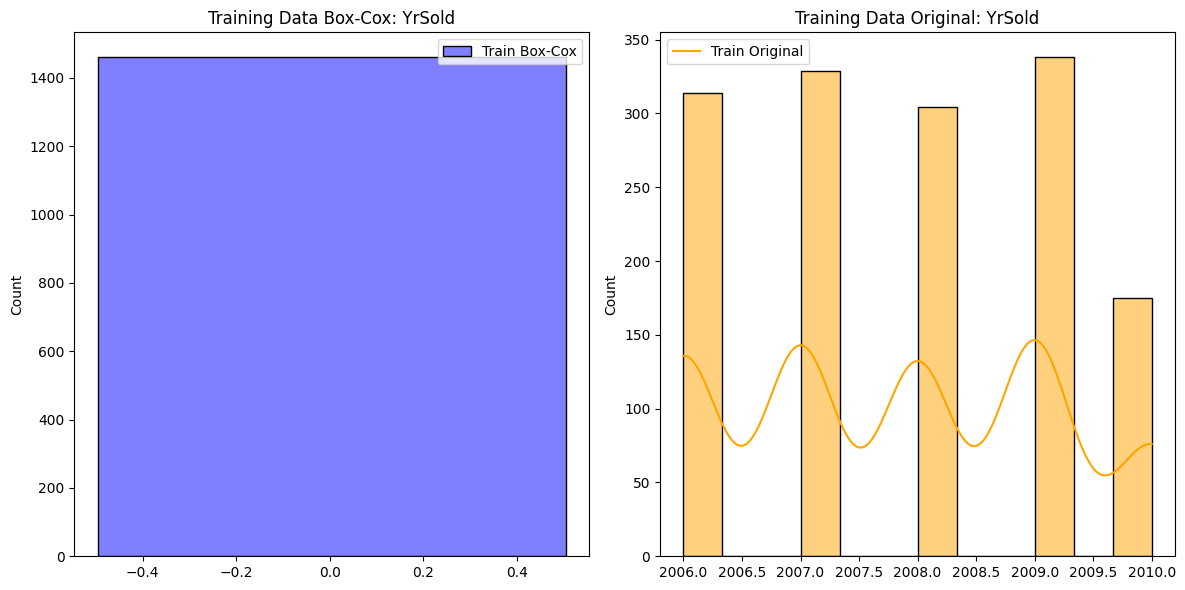

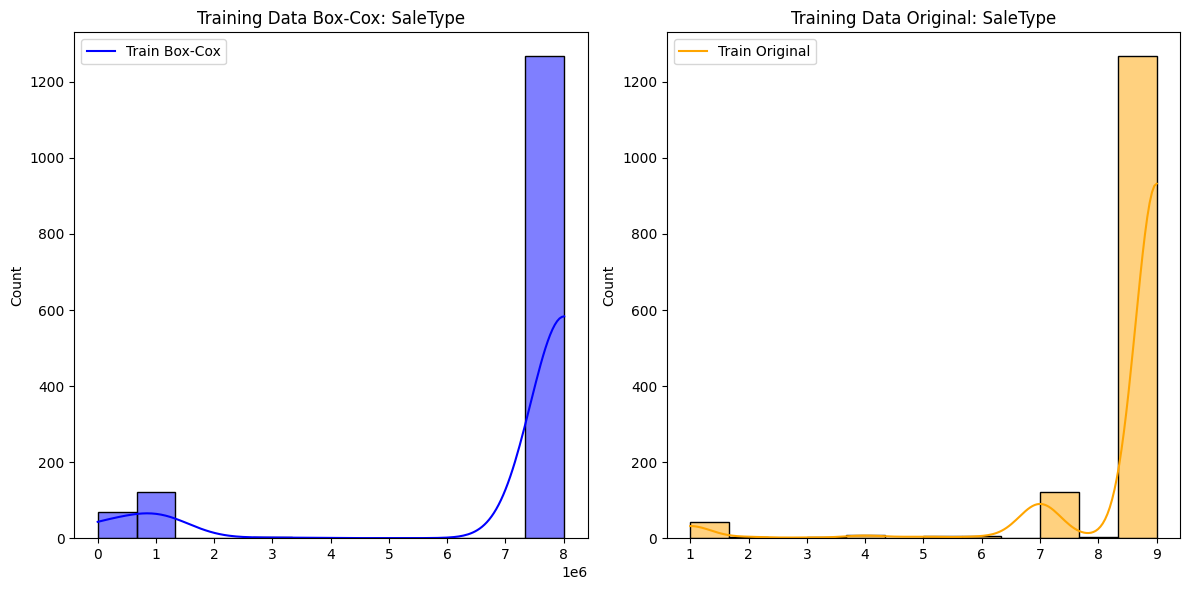

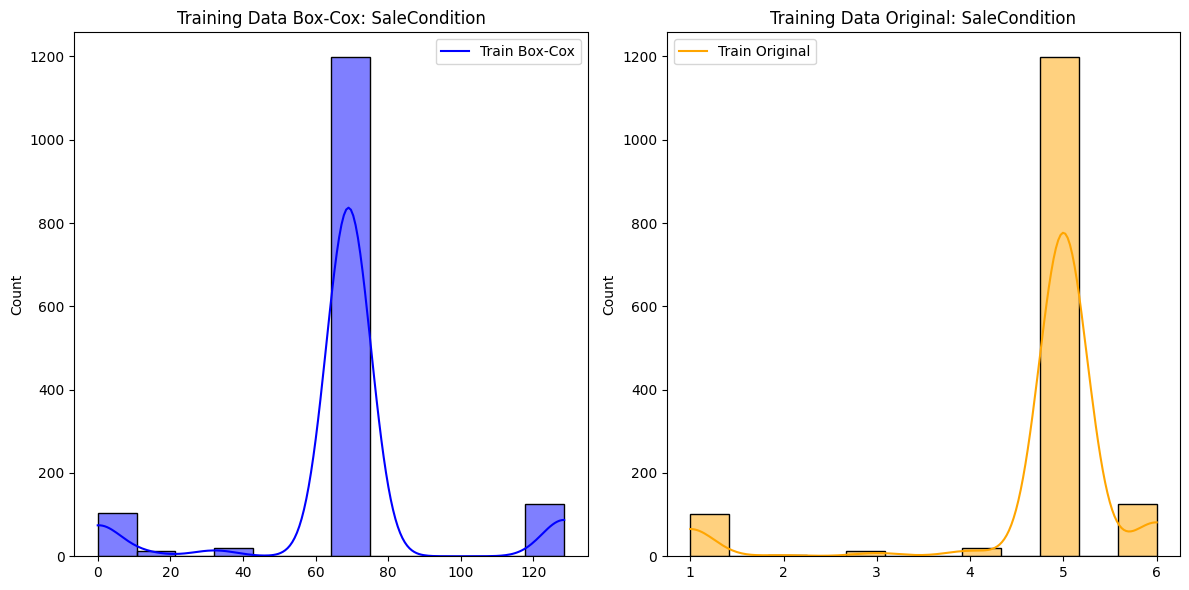

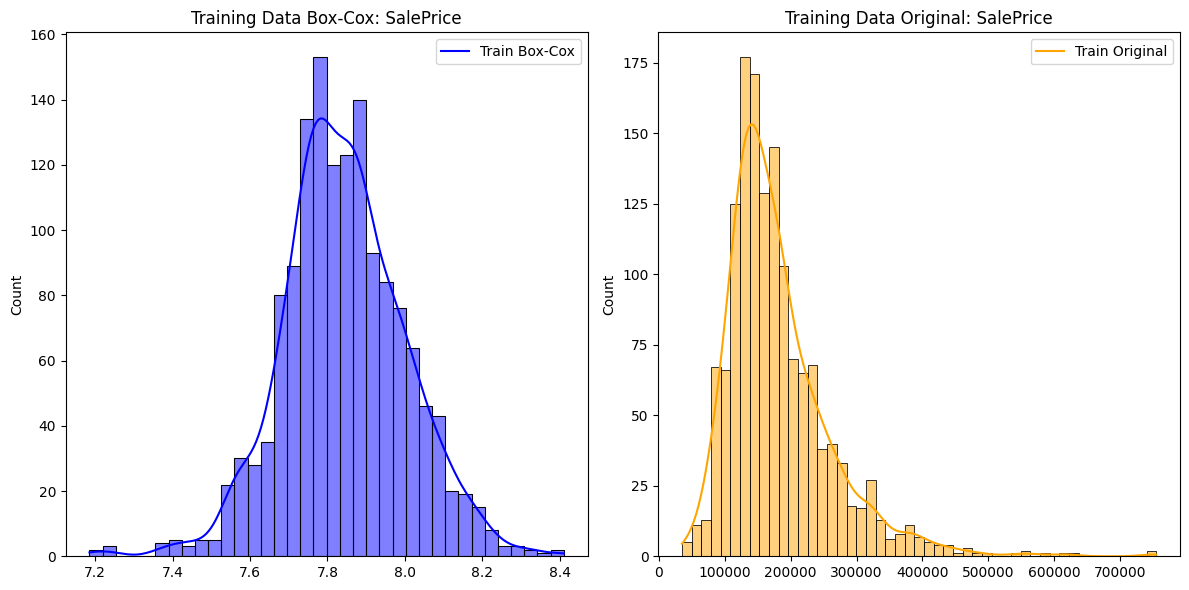

In [18]:
# Define a function to handle the Box-Cox transformation
def safe_boxcox(data):
    try:
        # Ensure data is positive
        if np.any(data <= 0):
            raise ValueError("All data must be positive for Box-Cox transformation.")
        
        transformed_data, _ = stats.boxcox(data)
        return transformed_data
    except Exception as e:
        print(f"Error applying Box-Cox to data: {e}")
        return data  # Return original data if transformation fails

for col in train_csv.columns[1:]:
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    # Convert the columns to one-dimensional arrays (flatten)
    train_col = np.array(train_csv[col]).flatten()  # Use .flatten() or .ravel() to ensure 1D

    # Apply Box-Cox transformation safely
    transformed_train_col = safe_boxcox(train_col)

    # Plot the distribution on the first subplot
    sns.histplot(transformed_train_col, ax=axs[0], color='blue', kde=True)  # Updated to sns.histplot
    axs[0].set_title(f'Training Data Box-Cox: {col}')
    axs[0].legend(['Train Box-Cox'])
    
    # Plot the distribution on the second subplot
    sns.histplot(train_col, ax=axs[1], color='orange', kde=True)  # Updated to sns.histplot
    axs[1].set_title(f'Training Data Original: {col}')
    axs[1].legend(['Train Original'])
    
    # Adjust layout for better spacing
    plt.tight_layout()
    
    # Show the plot
    plt.show()

In [19]:
"""
Next:
- Try different bounds: 90% upper bound and whether remove lower bound slightly
- Try Randomforest and Elastic-net
"""

'\nNext:\n- Try square root transformation\n- Try different bounds: 90% upper bound and whether remove lower bound slightly\n- Try Randomforest and Elastic-net\n'